# **Build a Python application to rank and classify Smartphone features.**

In [ ]:
#importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#reading the CSV file to python environment train dataset
mobile_data=pd.read_csv("/content/MobileTrain.csv")

In [ ]:
#reading the CSV file to python environment test dataset
mobile_data_test=pd.read_csv("/content/MobileTest.csv")

In [ ]:
#checking whether the dataset is correctly loaded by displaying the 1st 3 and last 3 columns
print("The first three entries of the dataset is :\n")
mobile_data.head(3)


The first three entries of the dataset is :



battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  

[3 rows x 21 columns]

In [ ]:
print("\nThe last three rows of the dataset is :\n ")
mobile_data.tail(3)


The last three rows of the dataset is :
 


battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[3 rows x 21 columns]

Thus we can be sure that all the 2000(0 to 1999) rows of data's are loaded.

**Understanding the dataset.**

In [ ]:
#checking the size of the dataset
print("The size of train dataset: " , mobile_data.shape)
print("The size of test dataset: " , mobile_data_test.shape)

The size of train dataset:  (2000, 21)
The size of test dataset:  (1000, 21)


Our train dataset contains 2000 row enteries and 21 column enteries and test data contains 1000 rows and 21 columns

In [ ]:
#checking the column headers
print("The column headers of train dataset are : " , mobile_data.columns)

print("\n The column headers of test dataset are : " , mobile_data_test.columns)

The column headers of train dataset are :  Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

 The column headers of test dataset are :  Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')


Our dataset contains columns like :
  ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'] which contains basic features of a smartphone.
       The test data doesnt contain our target column price range, where as train data contains it so its a suoervised learning method. The additional column that test data contains is the id column, which we can omit.

In [ ]:
#checking the data types of each column
print("The data types of train data column are : \n")
mobile_data.dtypes

The data types of train data column are : 



battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

No categorical datas are present so encoding is not needed.

In [ ]:
#checking basic info of a dataset
print("The data type and number of non null values in train dataset : \n")
mobile_data.info()

The data type and number of non null values in train dataset : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   

It gives us the column header name, no:of non null values and data types of each columns of our dataset

In [ ]:
print("The basic description of train dataset is : \n")
mobile_data.describe()

The basic description of train dataset is : 



battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

From this we can see the count, mean , standard deviation, minimum and maximum values and the three quartile values of all the columns present in the dataset.
Here we can see the standard deviation is very large for battery power This shows how the data's are spread from the mean. A low standard deviation indicates that the data points tend to be very close to the mean; a high standard deviation indicates that the data points are spread out over a large range of values. So its good to apply scaling to the dataset.

In [ ]:
#checking for null valuues
print("The null values contains in each solumn of train dataset is as : \n")
print(mobile_data.isnull().sum())
print("\n The null values contains in each solumn of test dataset is as : \n")
print(mobile_data_test.isnull().sum())


The null values contains in each solumn of train dataset is as : 

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

 The null values contains in each solumn of test dataset is as : 

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64


This shows there no null values in the dataset, so the step as cleaning the dataset is not needed to be done.

**Now we can move to the next step to create some meaningful insights from the dataset. Visualizing the data will be more meaningful that seeing the numbers.**

**Data Visualization/ Exploratory data analysis(EDA)**

*1. Univariant Analysis*

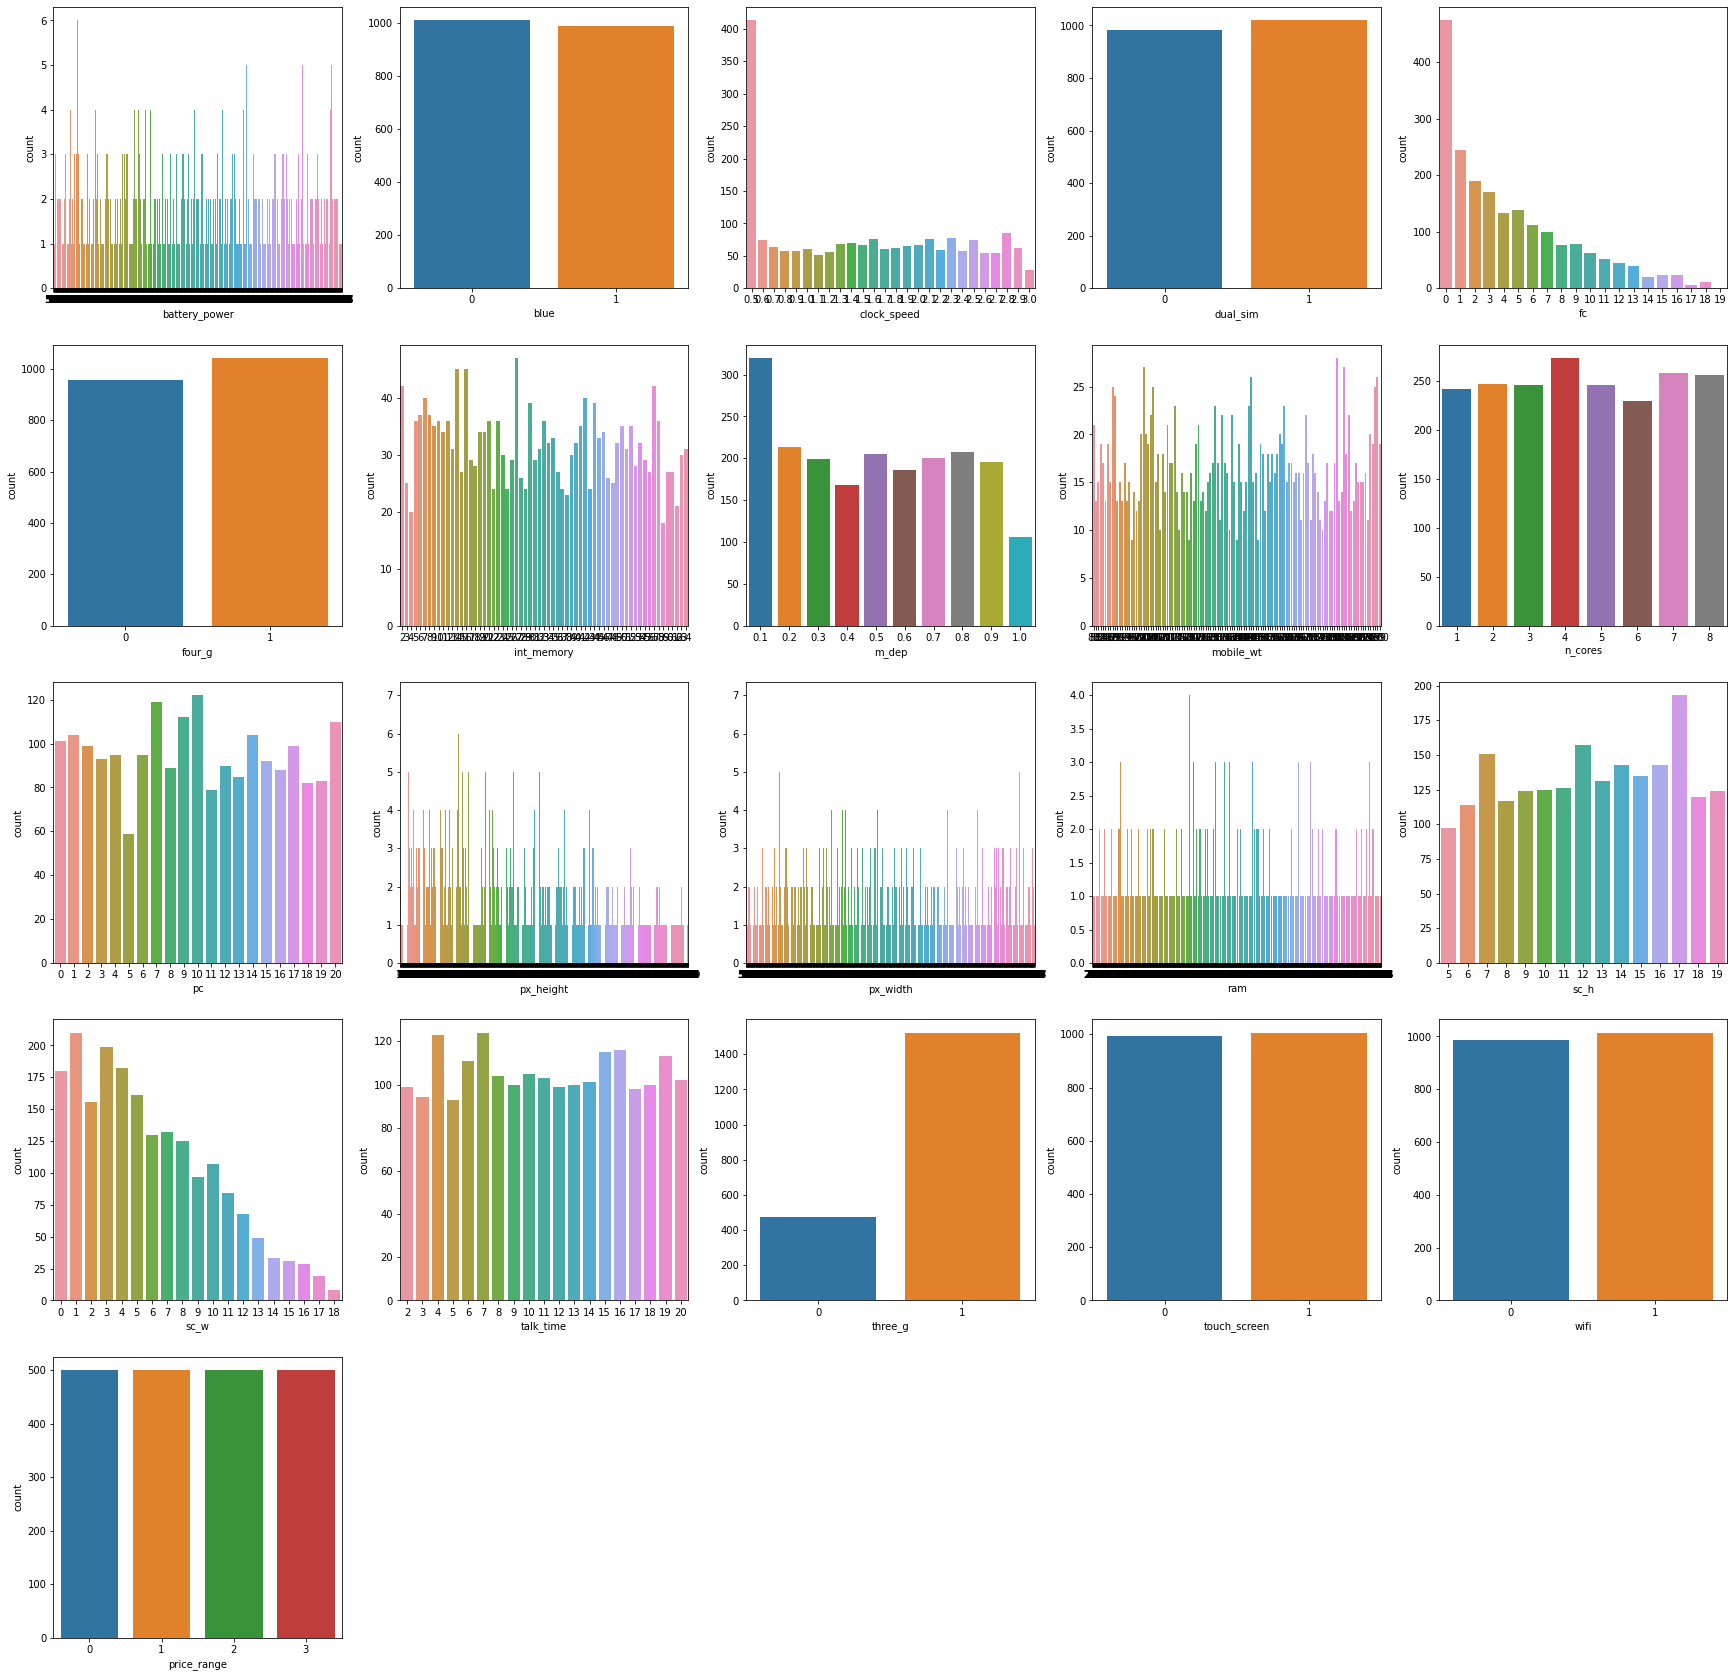

In [ ]:
#countplot
column_name=mobile_data.columns
len_c=len(column_name)
j=1
plt.figure(figsize=(30,30))
for i in range(0,len_c):
  plt.subplot(5,5,j)
  sns.countplot(x=mobile_data[column_name[i]])
  j=j+1
plt.show()

its not easy to interpret from this count plot, so what we are going to dois that we are going to delete columns that have more no:of unique values and also going to plot count plots as two seperate plots, one which contain unique value below 10 and other with unique values between 10 and 30. deleting all other columns above 30 unique enteries, since we cant get a meaningful visualization from that.

In [ ]:
#checking for the unique no:of enteries in the dataframe
print("\n The unique values in each column are: \n")
print(mobile_data.nunique())


 The unique values in each column are: 

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64


In [ ]:
#mobile_data.shape

In [ ]:
#creating a copy of the dataset which contains columns which have unique value less than 10.
mobile_data_copy=mobile_data[["blue","dual_sim","four_g","n_cores","three_g","touch_screen","wifi","price_range"]]
print("The shape of the new dataframe : ", mobile_data_copy.shape)
#mobile_data.shape


The shape of the new dataframe :  (2000, 8)


Length of the new dataset: 8
0    1010
1     990
Name: blue, dtype: int64
1    1019
0     981
Name: dual_sim, dtype: int64
1    1043
0     957
Name: four_g, dtype: int64
4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64
1    1523
0     477
Name: three_g, dtype: int64
1    1006
0     994
Name: touch_screen, dtype: int64
1    1014
0     986
Name: wifi, dtype: int64
1    500
2    500
3    500
0    500
Name: price_range, dtype: int64


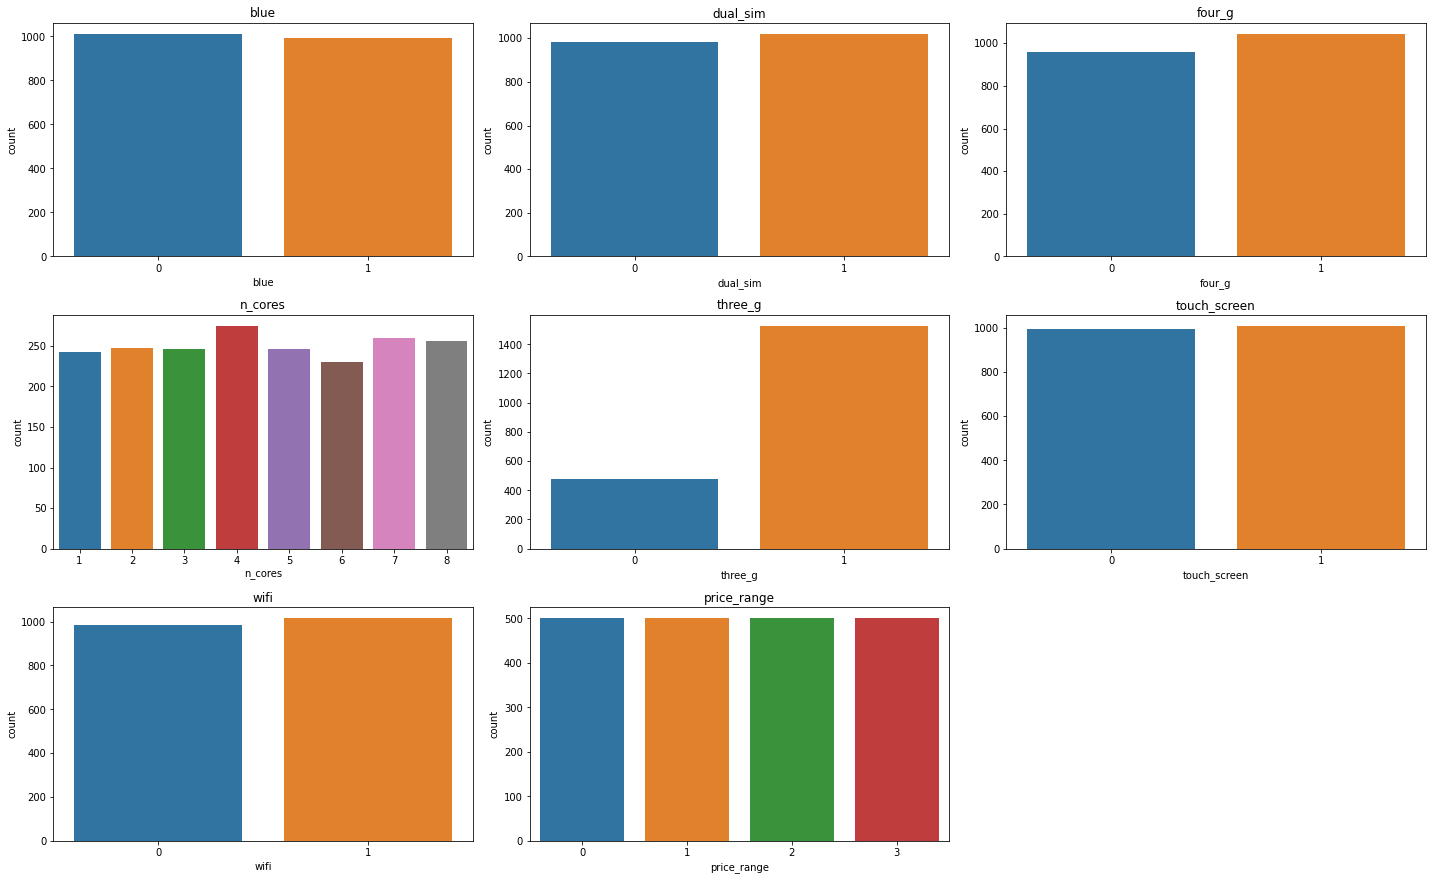

In [ ]:
#count plot for the new (less than 10) dataframe
column_name=mobile_data_copy.columns
len_c=len(column_name)
print("Length of the new dataset:",len_c)
j=1
plt.figure(figsize=(20,20))
for i in range(0,len_c):
  print(mobile_data_copy[column_name[i]].value_counts())
  plt.subplot(5,3,j)
  sns.countplot(x=mobile_data_copy[column_name[i]])
  plt.title(column_name[i])
  j=j+1
plt.tight_layout()  
plt.show()


From the graph and values we got we gets a clear picture of the dataset.
 For example.
 1. In case of the column bluetooth, 1010 doesnt have bluetooth and 990 have bluetooth in it.
 2. Similarly, in case of dual sim specification, 1019 have one and 981 doesnt. These can be seen from the graph too.
 3. from the graph its clear that for 3G facility, most of the phone have one.
 4. tHus we can intrepret for all the columns.




In [ ]:
#mobile_data.shape

In [ ]:
# taking only columns that have unique value above 10 and below 30 and creating a new dataframe:"mobile_data_copy_2"
mobile_data_copy_2=mobile_data.drop(["blue","dual_sim","four_g","n_cores","three_g","touch_screen","wifi","price_range","battery_power","int_memory","mobile_wt","px_height","px_width","ram"], axis=1)
print(mobile_data_copy_2.shape)

(2000, 7)


Length of the new dataset: 7
0.5    413
2.8     85
2.3     78
2.1     76
1.6     76
2.5     74
0.6     74
1.4     70
1.3     68
1.5     67
2.0     67
1.9     65
0.7     64
1.8     62
2.9     62
1.0     61
1.7     60
2.2     59
0.9     58
2.4     58
0.8     58
1.2     56
2.6     55
2.7     55
1.1     51
3.0     28
Name: clock_speed, dtype: int64
0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: fc, dtype: int64
0.1    320
0.2    213
0.8    208
0.5    205
0.7    200
0.3    199
0.9    195
0.6    186
0.4    168
1.0    106
Name: m_dep, dtype: int64
10    122
7     119
9     112
20    110
1     104
14    104
0     101
2      99
17     99
4      95
6      95
3      93
15     92
12     90
8      89
16     88
13     85
19     83
18     82
11     79
5      59
Name: pc, dtype: int64
17    193
12    157
7     151
16    143
14    143
15    135
1

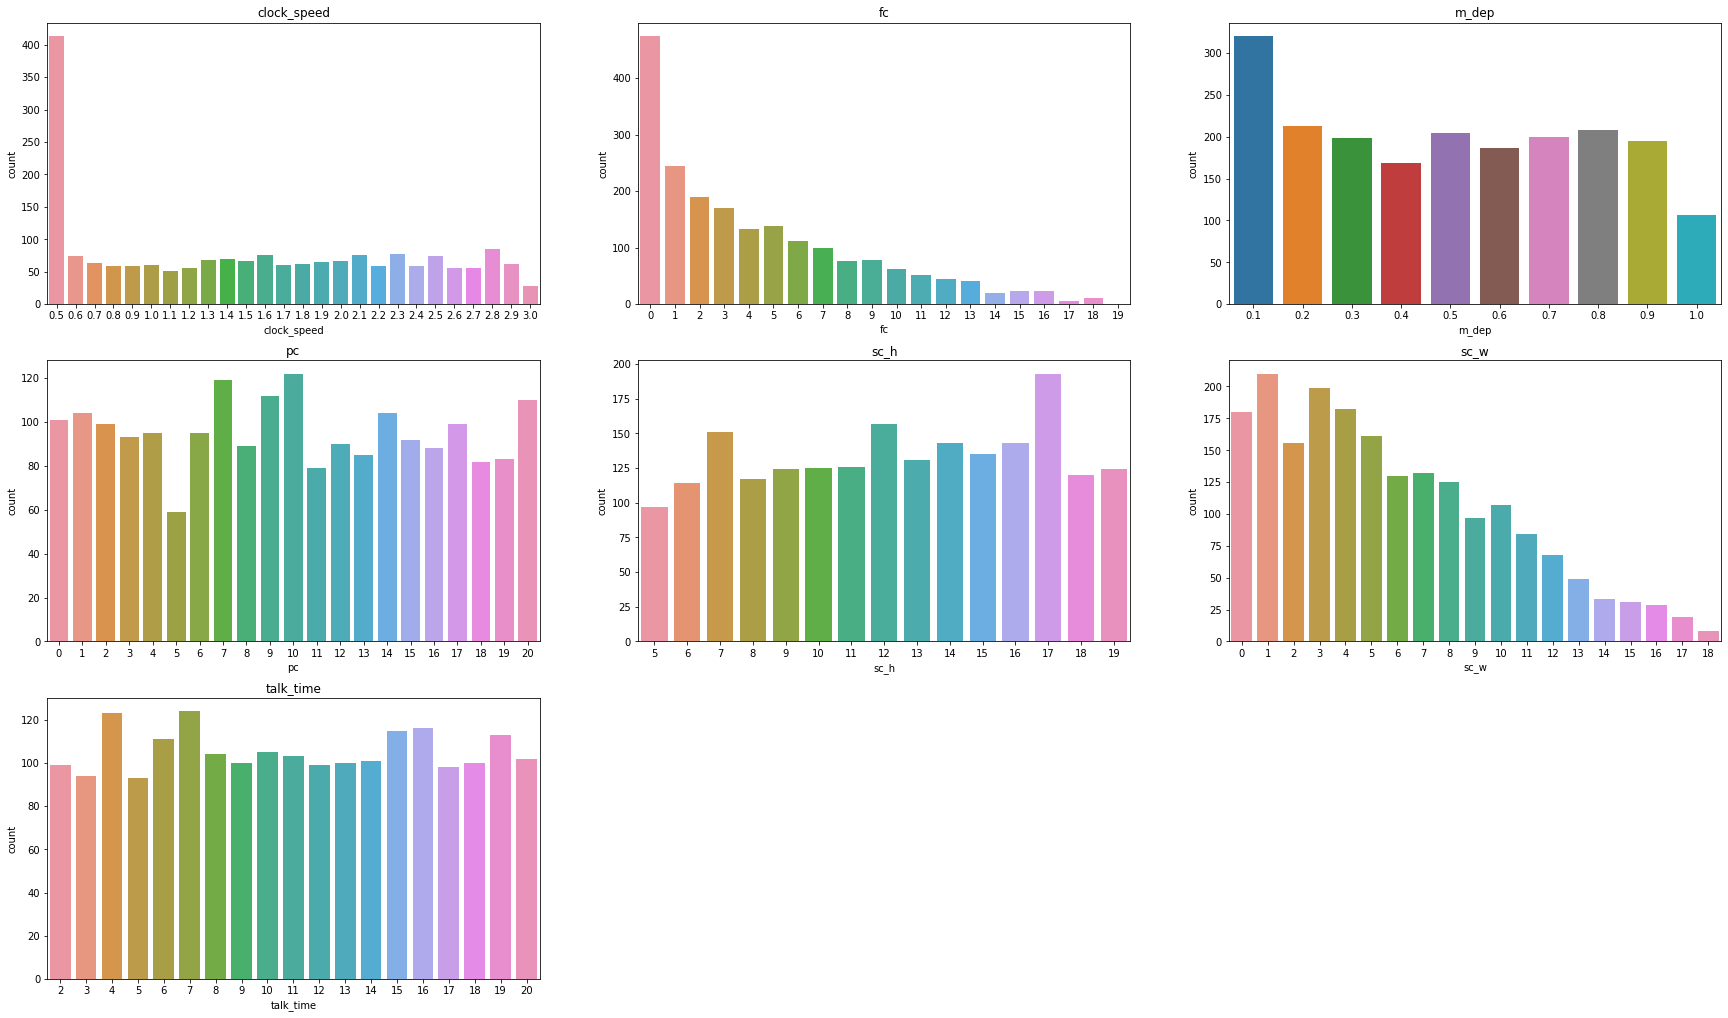

In [ ]:
#count plot
column_name=mobile_data_copy_2.columns
len_c=len(column_name)
print("Length of the new dataset:",len_c)
j=1
plt.figure(figsize=(30,30))
for i in range(0,len_c):
  print(mobile_data_copy_2[column_name[i]].value_counts().sort_values(ascending=False))
  plt.subplot(5,3,j)
  sns.countplot(x=mobile_data_copy_2[column_name[i]])
  plt.title(column_name[i])
  j=j+1
plt.show()

From the above facts and figures, we can see the unique count for most of the hardware part of the dataset.



(2000, 9)
Length of the new dataset: 9


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

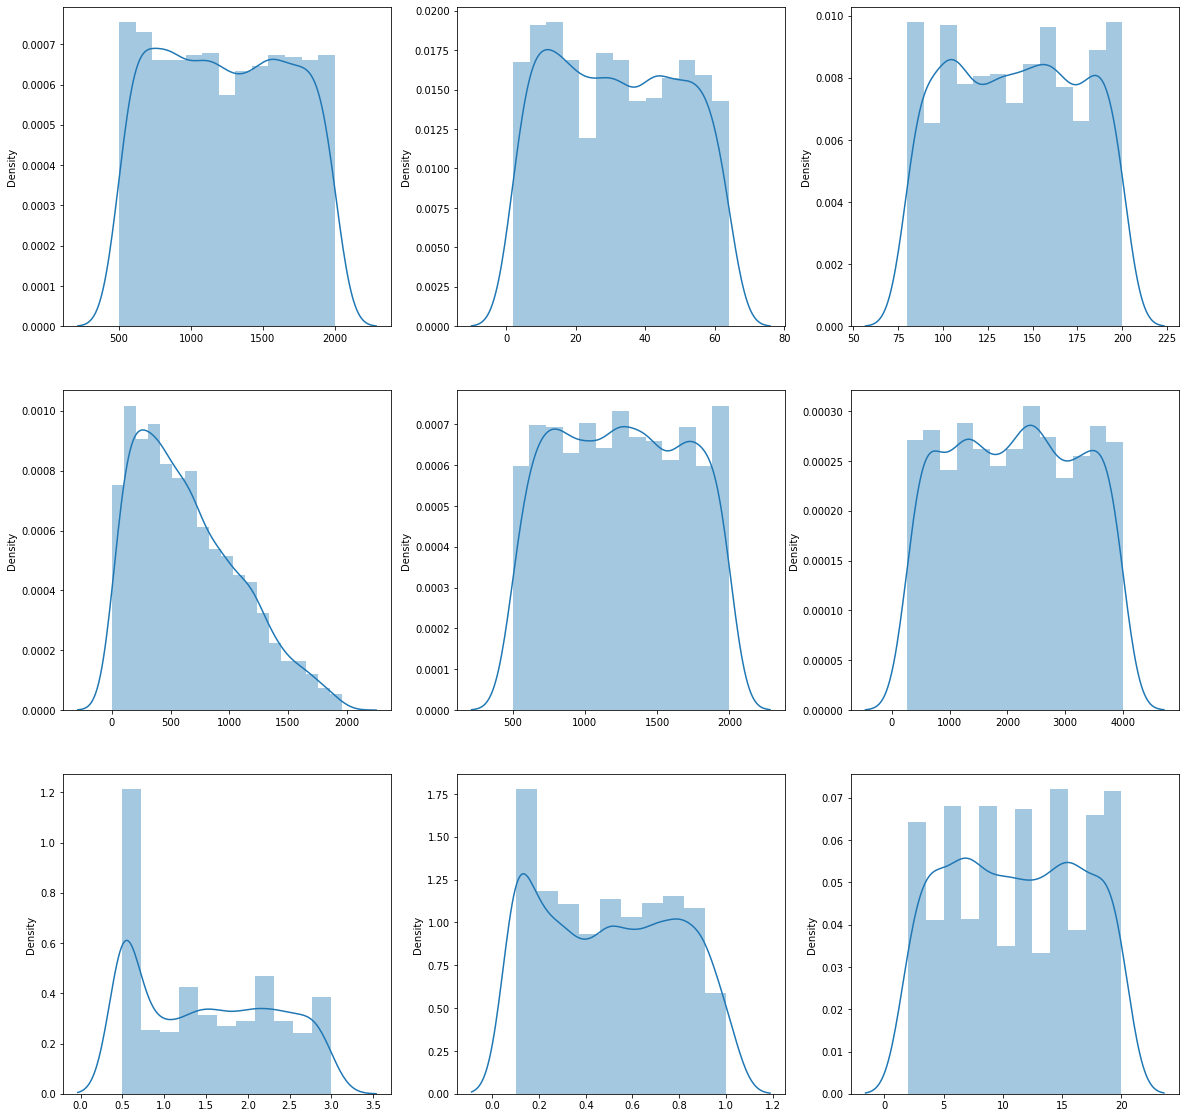

In [ ]:
#dealing with continous variable in the dataset
#Seaborn Distplot represents the overall distribution of continuous data variables.
#distplot
mobile_data_copy_3=mobile_data[["battery_power","int_memory","mobile_wt","px_height","px_width","ram","clock_speed","m_dep","talk_time"]]
print(mobile_data_copy_3.shape)

column_name=mobile_data_copy_3.columns
len_c=len(column_name)
print("Length of the new dataset:",len_c)
j=1
plt.figure(figsize=(20,20))

for i in range(0,len_c):
  plt.subplot(3,3,j)
  sns.distplot(x=mobile_data_copy_3[column_name[i]],kde=True)
  j=j+1
  
plt.show()

Now we can see the distribution of continous variables of our dataframe.


In [ ]:
#pie chart
mobile_data_copy.head(2)

blue  dual_sim  four_g  n_cores  three_g  touch_screen  wifi  price_range
0     0         0       0        2        0             0     1            1
1     1         1       1        3        1             1     0            2

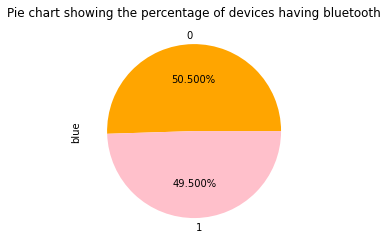

In [ ]:
#pie chart of devices having bluetooth facility
mobile_data_copy['blue'].value_counts().plot(kind='pie', y='blue', autopct='%1.3f%%',title="Pie chart showing the percentage of devices having bluetooth",colors = ['orange', 'pink'])

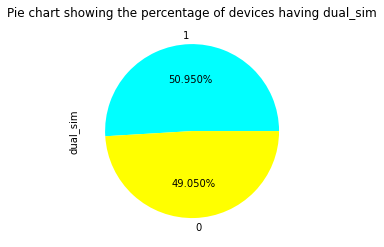

In [ ]:
#pie chart of devices having dual_sim facility
mobile_data_copy['dual_sim'].value_counts().plot(kind='pie', y='dual_sim', autopct='%1.3f%%',title="Pie chart showing the percentage of devices having dual_sim",colors = ['cyan', 'yellow'])

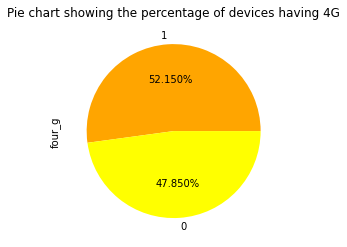

In [ ]:
#pie chart of devices having 4G facility
mobile_data_copy['four_g'].value_counts().plot(kind='pie', y='four_g', autopct='%1.3f%%',title="Pie chart showing the percentage of devices having 4G",colors = ['orange', 'yellow'])

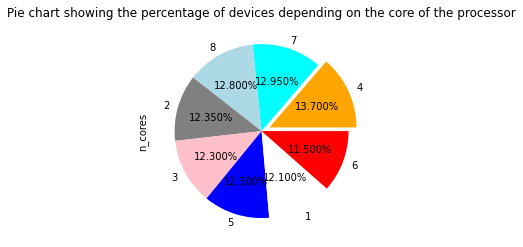

In [ ]:
#pie chart of devices depending on the cores
colors = ( "orange", "cyan", "lightblue", "grey","pink","blue","white","red")
explode = (0.1, 0, 0,0,0,0,0,0)
mobile_data_copy['n_cores'].value_counts().plot(kind='pie', y='n_cores', autopct='%1.3f%%',explode=explode,title="Pie chart showing the percentage of devices depending on the core of the processor", colors = colors)

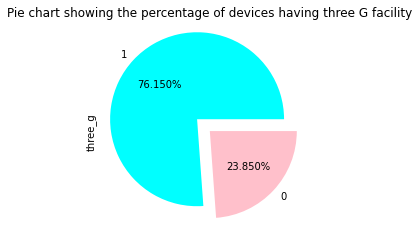

In [ ]:
#pie chart of devices having three g facility
mobile_data_copy['three_g'].value_counts().plot(kind='pie', y='three_g', autopct='%1.3f%%',explode=(0.2,0),title="Pie chart showing the percentage of devices having three G facility",colors = ['cyan', 'pink'])

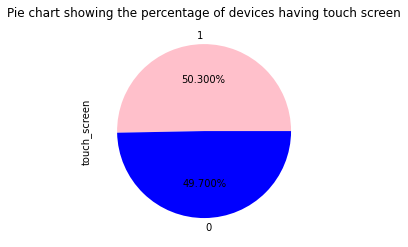

In [ ]:
#pie chart of devices having touch screen facility
mobile_data_copy['touch_screen'].value_counts().plot(kind='pie', y='touch_scree', autopct='%1.3f%%',title="Pie chart showing the percentage of devices having touch screen",colors = ['pink', 'blue'])

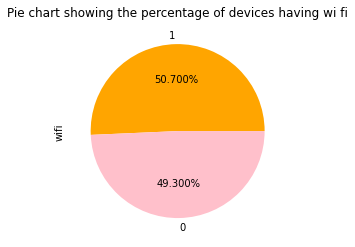

In [ ]:
#pie chart of devices having wifi facility
mobile_data_copy['wifi'].value_counts().plot(kind='pie', y='wifi', autopct='%1.3f%%',title="Pie chart showing the percentage of devices having wi fi",colors = ['orange', 'pink'])

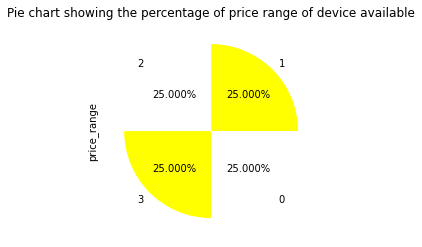

In [ ]:
#pie chart of devices depending on the price range
mobile_data_copy['price_range'].value_counts().plot(kind='pie', y='price_range', autopct='%1.3f%%',title="Pie chart showing the percentage of price range of device available",colors = ['yellow', 'white'])

*Bivariant analysis*

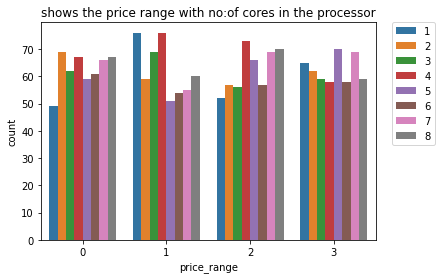

In [ ]:
#price dependence on no:of cores
sns.countplot(data=mobile_data,x="price_range",hue="n_cores")
plt.title("shows the price range with no:of cores in the processor")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

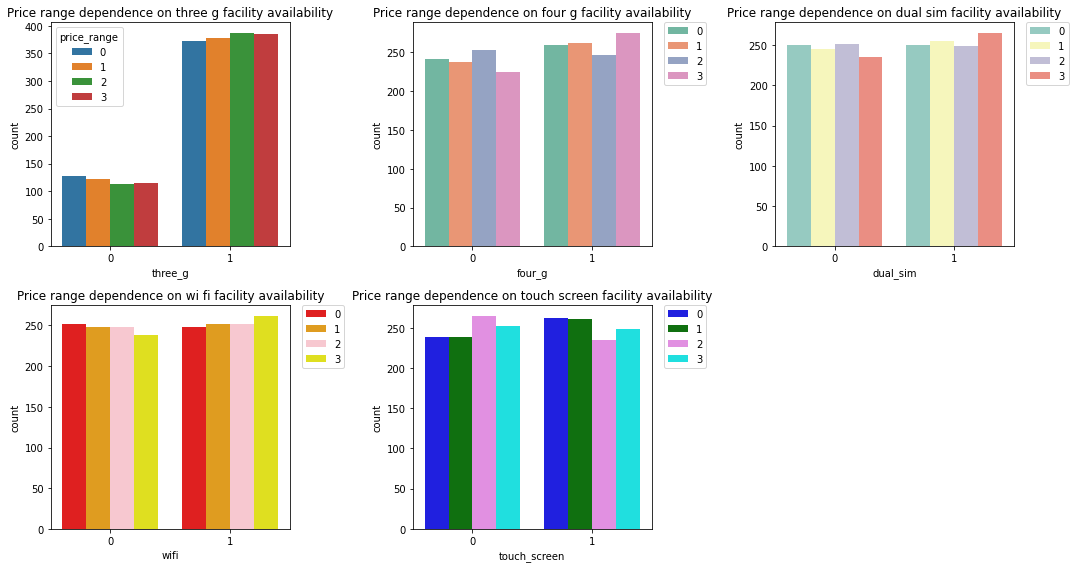

In [ ]:
# price range dependence on different features using count plot
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.countplot(data=mobile_data,x="three_g",hue="price_range")
plt.title("Price range dependence on three g facility availability")


plt.subplot(2,3,2)
sns.countplot(data=mobile_data,x="four_g",hue="price_range",palette="Set2")
plt.title("Price range dependence on four g facility availability")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.subplot(2,3,3)
sns.countplot(data=mobile_data,x="dual_sim",hue="price_range",palette="Set3")
plt.title("Price range dependence on dual sim facility availability")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.subplot(2,3,4)
sns.countplot(data=mobile_data,x="wifi",hue="price_range",palette=["red","orange","pink","yellow"])
plt.title("Price range dependence on wi fi facility availability")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.subplot(2,3,5)
sns.countplot(data=mobile_data,x="touch_screen",hue="price_range",palette=["blue","green","violet","cyan"])
plt.title("Price range dependence on touch screen facility availability")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.show()


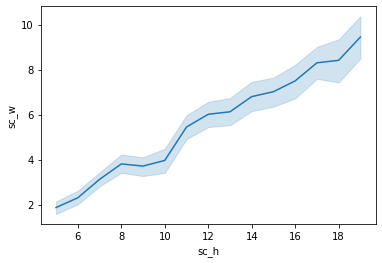

In [ ]:
#dependence of screen height and width

sns.lineplot(x="sc_h",y="sc_w",data=mobile_data)



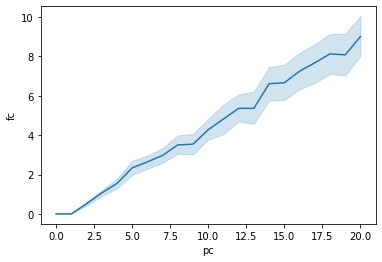

In [ ]:
#front camera and primary camera dependence
sns.lineplot(x="pc",y="fc",data=mobile_data)

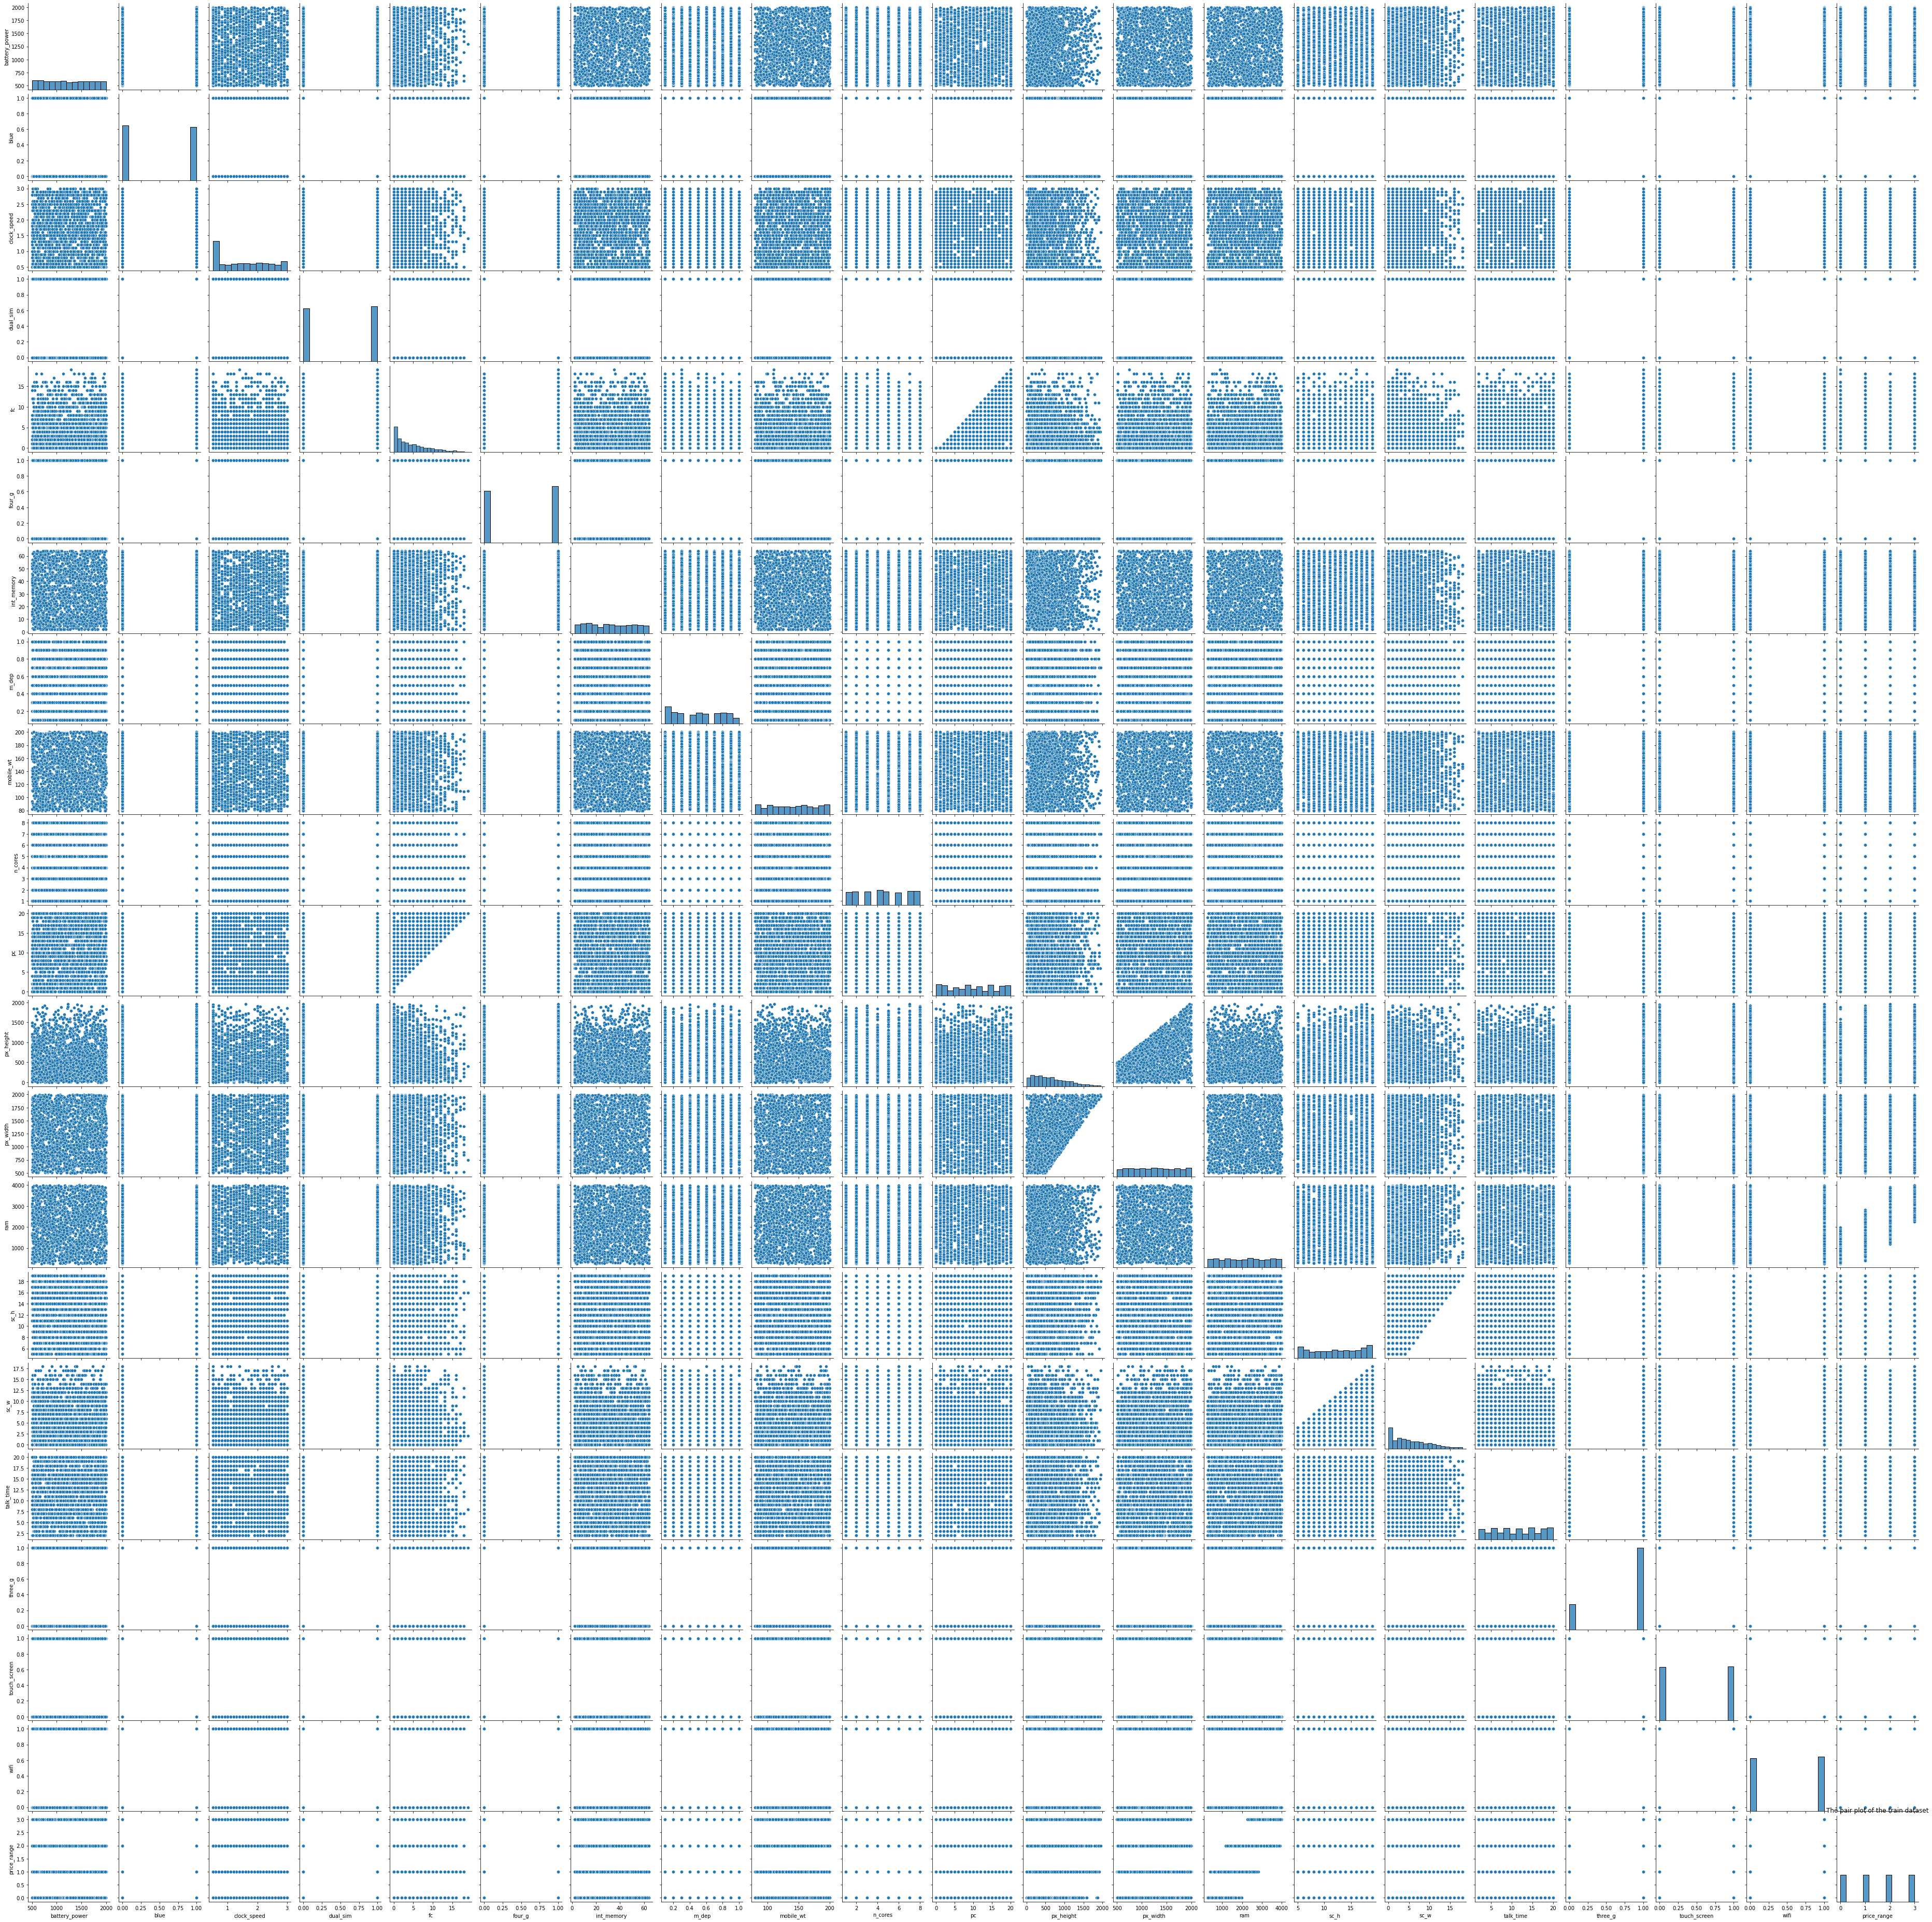

In [ ]:
#pairplot
sns.pairplot(mobile_data)
plt.title("The pair plot of the train dataset")
plt.show()

The above graph shows the pairplot ie; each feature of the dataset is plotted with respect to each other

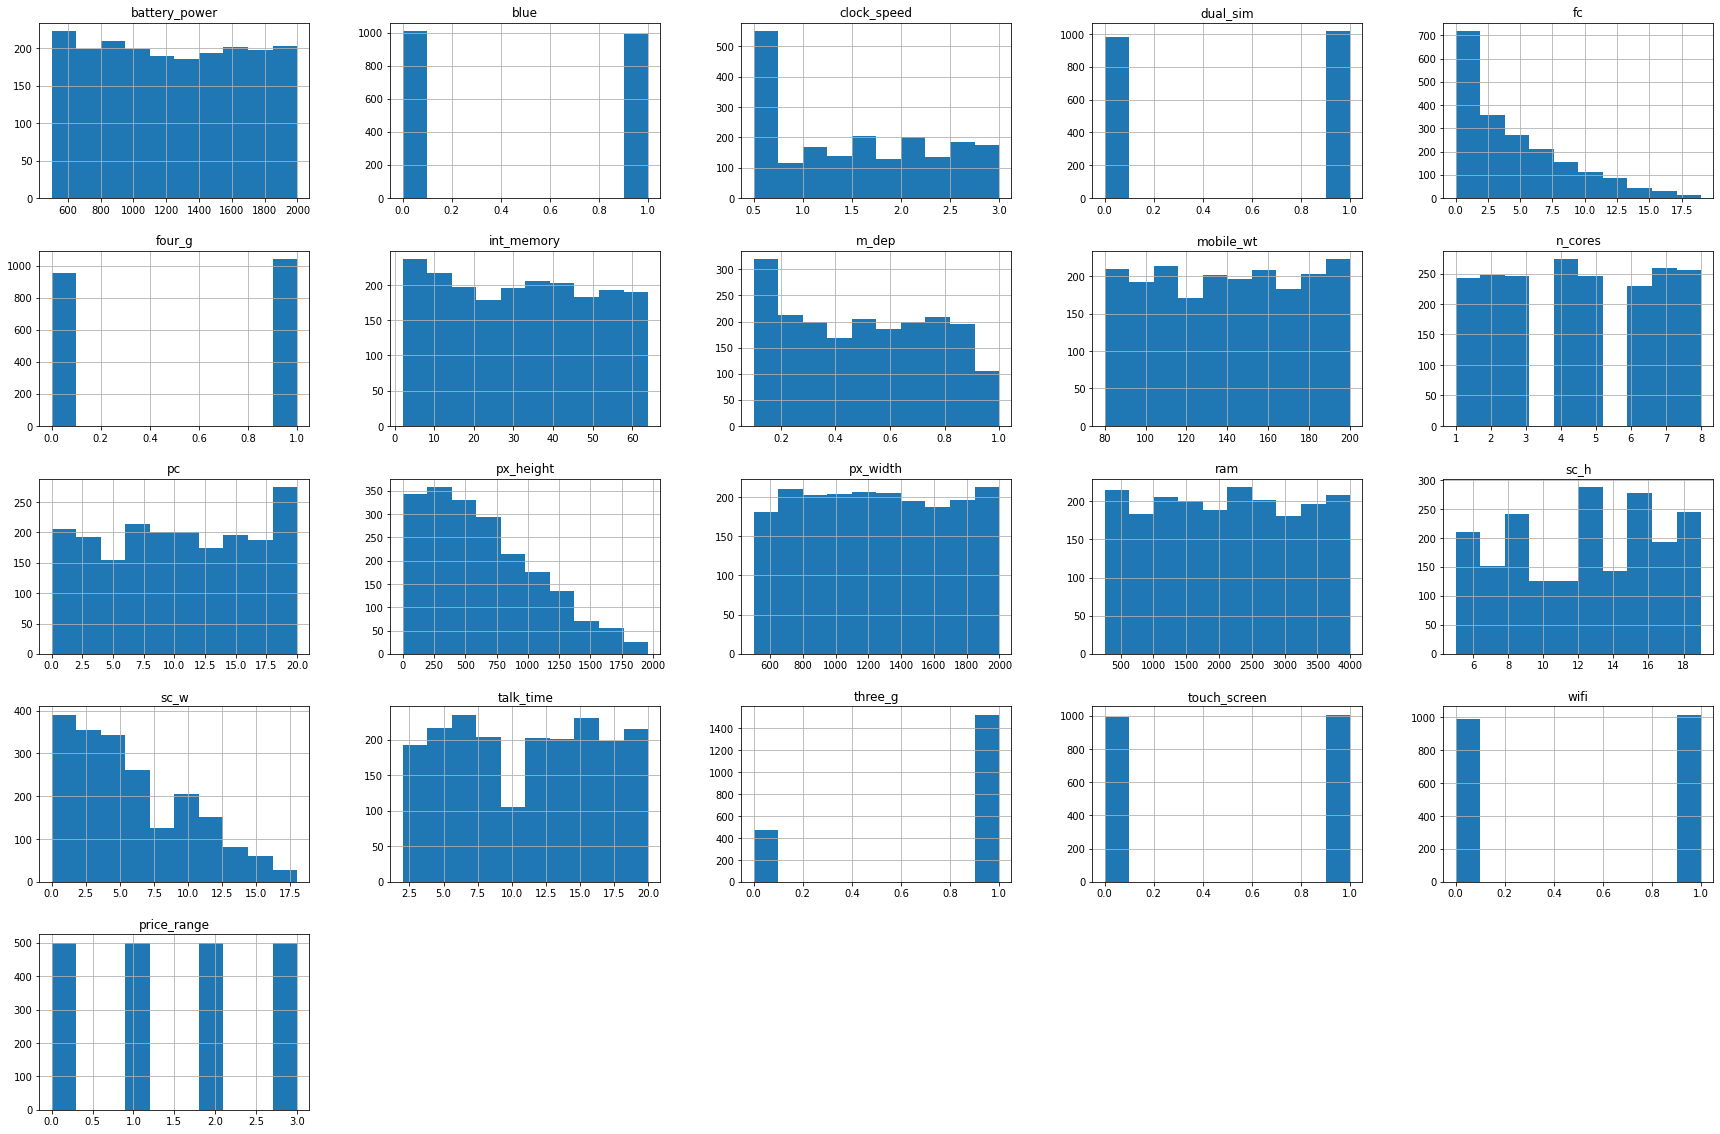

In [ ]:
#histogram of the train dataset
mobile_data.hist(figsize=(30,20))
plt.title("Histogram of all features in train dataset")
plt.show()

Since ram and battery power havehigh correlation with price range we are going to plot the swarmplot of those


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 64.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 51.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 48.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 61.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 23.8% of the points cannot be placed; y

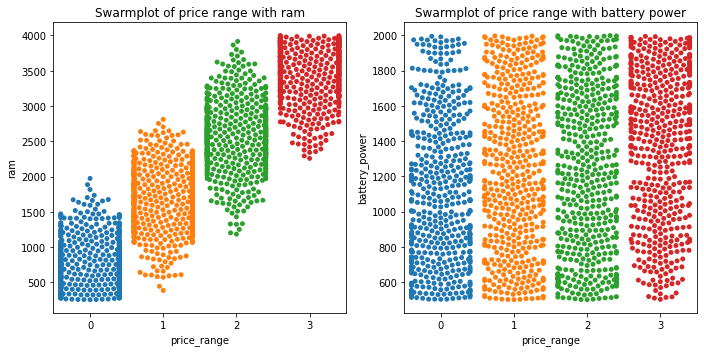

In [ ]:
#swarmplot of price range with ram and battery power
print("Since ram and battery power havehigh correlation with price range we are going to plot the swarmplot of those")
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.swarmplot(x = "price_range",y = "ram",data =mobile_data)
plt.title("Swarmplot of price range with ram")
plt.subplot(1,2,2)
sns.swarmplot(x = "price_range",y = "battery_power",data =mobile_data)
plt.title("Swarmplot of price range with battery power")
plt.tight_layout()
plt.show()

For high price range RAM features is high. So as price range increases, ram faeture is also increasing.
Battery power and price range have no much dependence.

**Splitting into hardware and software components**

For high price range RAM features is high. So as price range increases, ram faeture is also increasing.
Battery power and price range have no much dependence.

This is done by treating n_cores and clock speed as software components and rest as hardware

In [ ]:
hardware_comp= mobile_data.loc[:,['battery_power','blue','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','wifi','price_range']]
hardware_comp.head(3)

battery_power  blue  dual_sim  fc  four_g  int_memory  m_dep  mobile_wt  \
0            842     0         0   1       0           7    0.6        188   
1           1021     1         1   0       1          53    0.7        136   
2            563     1         1   2       1          41    0.9        145   

   n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  three_g  \
0        2   2         20       756  2549     9     7         19        0   
1        3   6        905      1988  2631    17     3          7        1   
2        5   6       1263      1716  2603    11     2          9        1   

   wifi  price_range  
0     1            1  
1     0            2  
2     0            2

In [ ]:
software_comp= mobile_data.loc[:,['n_cores','clock_speed']]
software_comp.head(2)

n_cores  clock_speed
0        2          2.2
1        3          0.5

**Feature Reduction**

Correaltion heatt map of train data


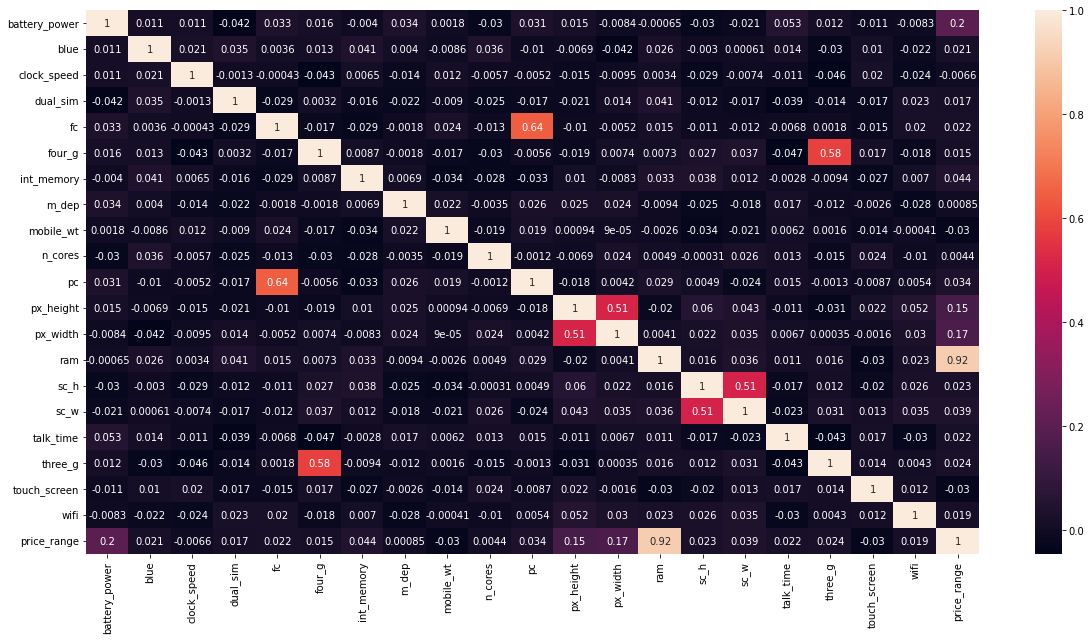

Correaltion heatt map of test data


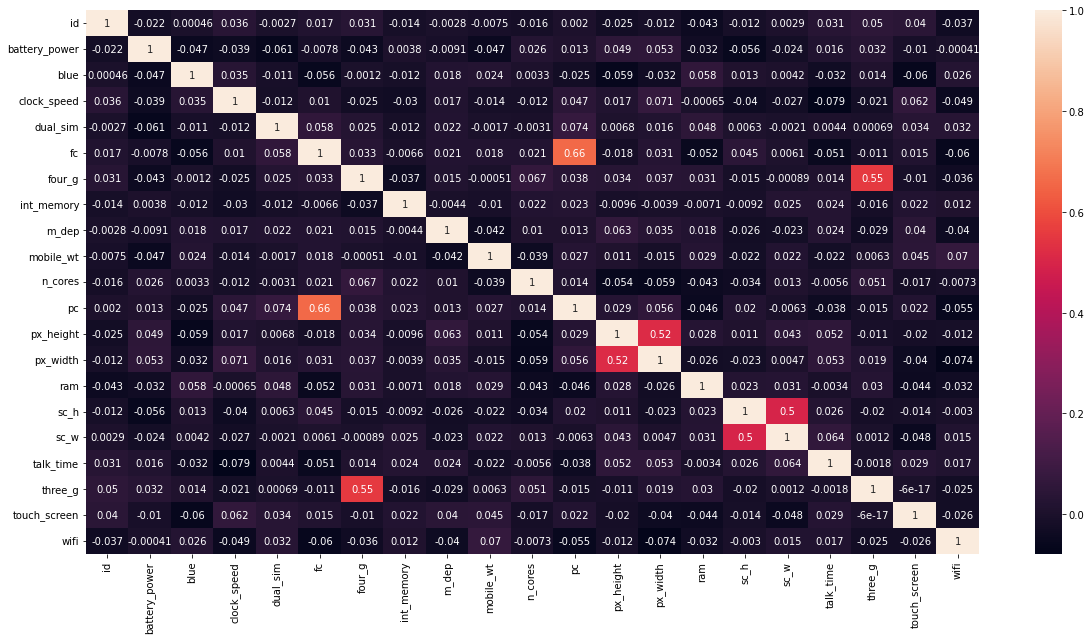

In [ ]:
#correlation
print("Correaltion heatt map of train data")
data_corr=mobile_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(data_corr,annot=True)
plt.show()

print("Correaltion heatt map of test data")
data_corr_test=mobile_data_test.corr()
plt.figure(figsize=(20,10))
sns.heatmap(data_corr_test,annot=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


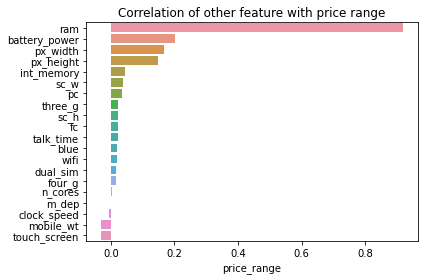

In [ ]:

correlation = data_corr['price_range'].sort_values(ascending = False)
corr = correlation[1:]
sns.barplot(corr,corr.index)
plt.title("Correlation of other feature with price range")
plt.tight_layout()
plt.show()

Only price range and RAM have high correlation, we cant delete any of those columns because price range is our target variable and price range have high dependence on RAM sprecification. So we are not deleting any features. 

**Outlier Handling** 

In [ ]:
mobile_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
#combining test and train data to remove outliers
mobile_data_new = pd.concat([mobile_data_test.assign(ind="test"), mobile_data.assign(ind="train")])
print("The shape of final dataset is :  ", mobile_data_new.shape)

The shape of final dataset is :   (3000, 23)


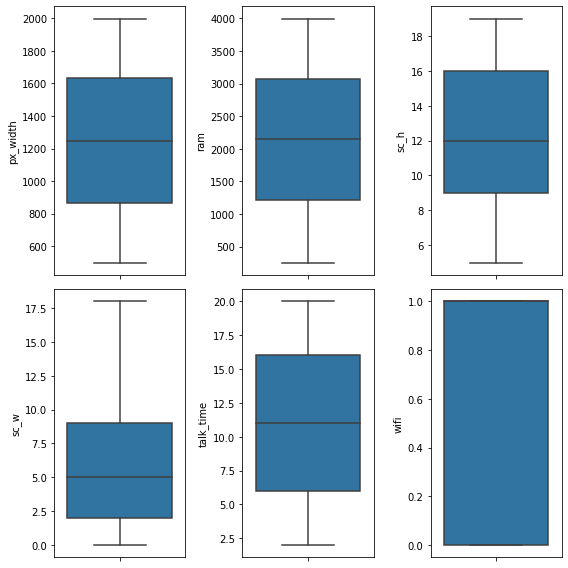

In [ ]:
#outlier handling
fig, axes = plt.subplots(2, 3, figsize=(8,8))
sns.boxplot(  y='px_width', data=mobile_data_new,  orient='v' , ax=axes[0, 0])
sns.boxplot(  y='ram',  data=mobile_data_new,  orient='v' , ax=axes[0, 1])
sns.boxplot(  y='sc_h', data=mobile_data_new,  orient='v' , ax=axes[0, 2])
sns.boxplot(  y='sc_w', data=mobile_data_new,  orient='v' , ax=axes[1, 0])
sns.boxplot(  y='talk_time',  data=mobile_data_new,  orient='v' , ax=axes[1, 1])
sns.boxplot(  y='wifi',  data=mobile_data_new,  orient='v' , ax=axes[1, 2])
plt.tight_layout()
plt.show()

No outlier in these columns

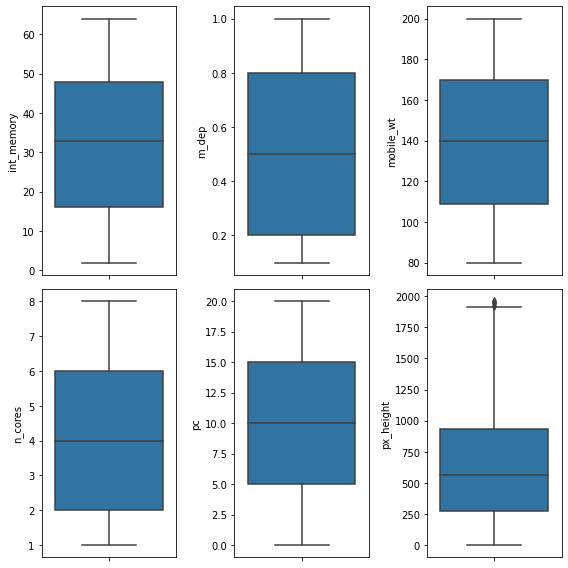

In [ ]:
#outlier handling
fig, axes = plt.subplots(2, 3, figsize=(8,8))
sns.boxplot(  y='int_memory', data=mobile_data_new,  orient='v' , ax=axes[0, 0])
sns.boxplot(  y='m_dep',  data=mobile_data_new,  orient='v' , ax=axes[0, 1])
sns.boxplot(  y='mobile_wt', data=mobile_data_new,  orient='v' , ax=axes[0, 2])
sns.boxplot(  y='n_cores', data=mobile_data_new,  orient='v' , ax=axes[1, 0])
sns.boxplot(  y='pc',  data=mobile_data_new,  orient='v' , ax=axes[1, 1])
sns.boxplot(  y='px_height',  data=mobile_data_new,  orient='v' , ax=axes[1, 2])
plt.tight_layout()
plt.show()

No outliers

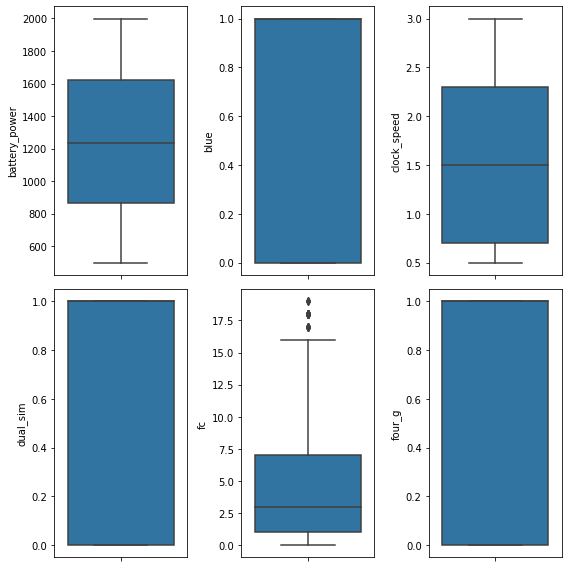

In [ ]:
#outlier handling
fig, axes = plt.subplots(2, 3, figsize=(8,8))
sns.boxplot(  y='battery_power', data=mobile_data_new,  orient='v' , ax=axes[0, 0])
sns.boxplot(  y='blue',  data=mobile_data_new,  orient='v' , ax=axes[0, 1])
sns.boxplot(  y='clock_speed', data=mobile_data_new,  orient='v' , ax=axes[0, 2])
sns.boxplot(  y='dual_sim', data=mobile_data_new,  orient='v' , ax=axes[1, 0])
sns.boxplot(  y='fc',  data=mobile_data_new,  orient='v' , ax=axes[1, 1])
sns.boxplot(  y='four_g',  data=mobile_data_new,  orient='v' , ax=axes[1, 2])
plt.tight_layout()
plt.show()

outlier is there only for the column fc so dropping those columns

In [ ]:
Q1=np.percentile(mobile_data_new["fc"],25,interpolation="midpoint")
print("Q1)",Q1)
Q2=np.percentile(mobile_data_new["fc"],50)
print("Q2",Q2)
Q3=np.percentile(mobile_data_new["fc"],75)
print("Q3",Q3)

IQR=Q3-Q1
print("IQR",IQR)

low_lim=Q1-1.5*IQR
upp_lim=Q3+1.5*IQR

print("low_lim",low_lim)
print("upp_lim",upp_lim)

outlier=[]
for x in mobile_data_new["fc"]:
    if (x>upp_lim) or (x<low_lim):
        outlier.append(x)

print("outlier", outlier)

ind1=mobile_data_new["fc"]>upp_lim

ind_1=mobile_data_new.loc[ind1].index

#print("index of outlier", ind1)

mobile_data_new.drop(ind_1,inplace=True)

Q1) 1.0
Q2 3.0
Q3 7.0
IQR 6.0
low_lim -8.0
upp_lim 16.0
outlier [18, 18, 18, 18, 17, 18, 17, 19, 19, 18, 18, 18, 18, 18, 18, 17, 18, 17, 17, 18, 17, 17, 18, 18, 18, 17, 18, 18, 19, 18, 18, 18]


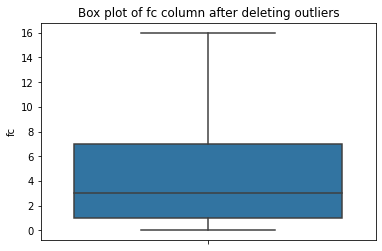

In [ ]:
sns.boxplot(  y='fc', data=mobile_data_new)
plt.title("Box plot of fc column after deleting outliers")
plt.show()

now no ouliers left in the dataset

**Seperating the two datasets back to train and test sets**

In [ ]:
mobile_data_test, mobile_data = mobile_data_new[mobile_data_new["ind"].eq("test")], mobile_data_new[mobile_data_new["ind"].eq("train")]

In [ ]:
print("The train set details:", mobile_data.shape)
mobile_data=mobile_data.drop(['id','ind'],axis=1)
print("\n", mobile_data.columns)

print("The test set details:", mobile_data_test.shape)
mobile_data_test=mobile_data_test.drop(['id','ind'],axis=1)
print("\n", mobile_data_test.columns)


The train set details: (1968, 23)

 Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')
The test set details: (978, 23)

 Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


**Splitting the dataset into independent and dependent variables**

In [ ]:
#independent variable "x_data"
x_data=mobile_data.drop(["price_range"],axis=1)
#dependent variable "y_data"
y_data=mobile_data["price_range"]
print(x_data.shape)
print(y_data.shape)
x_data_1=x_data.copy()
x_data_1.head(2)

(1968, 20)
(1968,)


battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   

   three_g  touch_screen  wifi  
0        0             0     1  
1        1             1     0

**Scaling**

In [ ]:
#standard scaling
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_data=scalar.fit_transform(x_data)
x_data=pd.DataFrame(x_data,columns=x_data_1.columns)
x_data.head(3)

battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0      -0.899849 -0.988883     0.831225 -1.018463 -0.766500 -1.042572   
1      -0.491937  1.011242    -1.251258  0.981872 -1.006245  0.959166   
2      -1.535643  1.011242    -1.251258  0.981872 -0.526756  0.959166   

   int_memory     m_dep  mobile_wt   n_cores        pc  px_height  px_width  \
0   -1.381860  0.338097   1.351141 -1.105124 -1.300264  -1.408561 -1.142001   
1    1.156995  0.684466  -0.118085 -0.668313 -0.636644   0.601257  1.711335   
2    0.494685  1.377205   0.136204  0.205310 -0.636644   1.414268  1.081377   

        ram      sc_h      sc_w  talk_time   three_g  touch_screen      wifi  
0  0.395175 -0.787338  0.281823   1.458439 -1.780307     -1.004073  0.990895  
1  0.470751  1.112409 -0.636054  -0.740954  0.561701      0.995943 -1.009189  
2  0.444944 -0.312401 -0.865524  -0.374388  0.561701      0.995943 -1.009189

**MODEL BUILDING**

Train test split

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,random_state=0,test_size=0.25)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(1476, 20)
(1476,)
(492, 20)
(492,)


Since it is a classification problem we are going to use different classification algorithms for our dataset. The main used here are :


1.   Logistic Regression
2.   k Nearest Neighbors
3.   Decision Tree
4.   Random Forest
5.   SVM
6.   Xg booster
7.   CatBooster
8.`  Naive Bayes




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,precision_score,recall_score,classification_report

**1. Logistic Regression**

In [ ]:
#creating an instance of logistic regression
lr = LogisticRegression()
#fitting the model
lr.fit(x_train,y_train)
#predicting the model
y_pred_lr=lr.predict(x_test)

#evaluation metrics
#training score
train_lr=round(lr.score(x_train,y_train),3)
print("the training score of logistic regression is : ", round(lr.score(x_train,y_train),3))
#testing score
acc_lr=accuracy_score(y_test,y_pred_lr)
print("Test Accuracy of Logistic Regression is : ",round(acc_lr,4)*100,"%" )
#confusion matrix
con_lr=confusion_matrix(y_test,y_pred_lr)
print("\n The confusion matrix of logistic regression is \n\n",con_lr)
#classification report
print("\n The classification report of logistic regression is : \n")
print(classification_report(y_test, y_pred_lr))

the training score of logistic regression is :  0.98
Test Accuracy of Logistic Regression is :  95.33 %

 The confusion matrix of logistic regression is 

 [[119   3   0   0]
 [  6 106   4   0]
 [  0   1 119   6]
 [  0   0   3 125]]

 The classification report of logistic regression is : 

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96       122
         1.0       0.96      0.91      0.94       116
         2.0       0.94      0.94      0.94       126
         3.0       0.95      0.98      0.97       128

    accuracy                           0.95       492
   macro avg       0.95      0.95      0.95       492
weighted avg       0.95      0.95      0.95       492



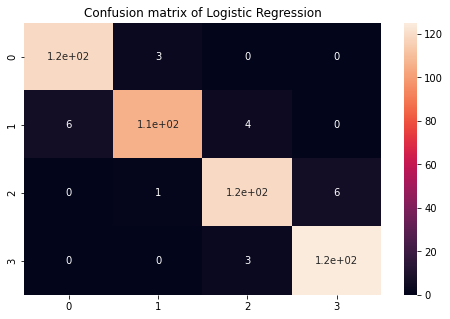

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(con_lr, annot=True)
plt.title("Confusion matrix of Logistic Regression")
plt.show()

**2. K Nearest Neighbors**

In [ ]:

acc_values=[]
import numpy as np
neighbor_1= np.arange(3,20)

#finding the optimum k number
for k in neighbor_1:
    classifier=KNeighborsClassifier(n_neighbors=k,metric="minkowski")
    classifier.fit(x_train,y_train)
    y_pred_knn=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred_knn)
    acc_values.append(round(acc,2))
    
print("The Accuracy score for k values = 3 to 20 is s : \n ",acc_values)   

The Accuracy score for k values = 3 to 20 is s : 
  [0.47, 0.51, 0.51, 0.49, 0.5, 0.49, 0.52, 0.53, 0.55, 0.55, 0.55, 0.56, 0.58, 0.57, 0.57, 0.58, 0.58]


Text(0.5, 1.0, 'No:of neighbor Vs Accuracy')

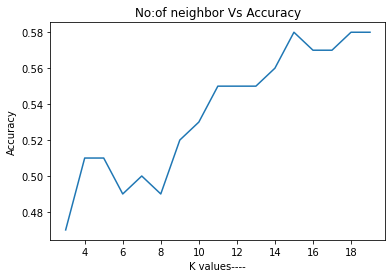

In [ ]:
#plotting the k Vs Accuracy value curve
plt.plot(neighbor_1,acc_values)
plt.xlabel("K values----")
plt.ylabel("Accuracy")
plt.title("No:of neighbor Vs Accuracy")

In [ ]:
#for k = 15 we got high accuracy
#K Nearest Neighbor Classifier instance creation
knn=KNeighborsClassifier(n_neighbors=15,metric="minkowski")
#fitting the model
knn.fit(x_train,y_train)
#predicting the model
y_pred_knn=knn.predict(x_test)


#Accuracy score of training set
train_knn=round(knn.score(x_train,y_train),3)
print("the training score of KNN is : ", round(knn.score(x_train,y_train),3))
#test accuracy calculation
acc_knn=accuracy_score(y_test,y_pred_knn)
print("The test accuracy score of KNN is :",round(acc_knn,4)*100,"%")
#confusion matrix
con_knn=confusion_matrix(y_test,y_pred_knn)
print("\n  Confusion matrix of KNN is : \n",con_knn)
print("\n The classification report of KNN :")
print(classification_report(y_test, y_pred_knn))

the training score of KNN is :  0.67
The test accuracy score of KNN is : 57.52 %

  Confusion matrix of KNN is : 
 [[94 26  2  0]
 [37 55 20  4]
 [12 36 59 19]
 [ 0 14 39 75]]

 The classification report of KNN :
              precision    recall  f1-score   support

         0.0       0.66      0.77      0.71       122
         1.0       0.42      0.47      0.45       116
         2.0       0.49      0.47      0.48       126
         3.0       0.77      0.59      0.66       128

    accuracy                           0.58       492
   macro avg       0.58      0.57      0.57       492
weighted avg       0.59      0.58      0.58       492



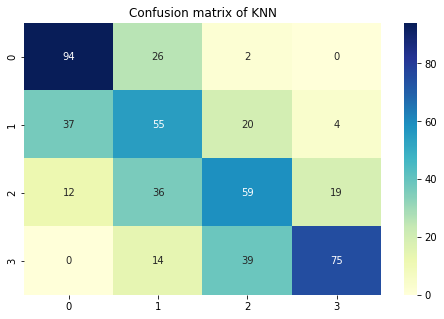

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(con_knn, annot=True,cmap="YlGnBu")
plt.title("Confusion matrix of KNN")
plt.show()

**3. Decision Tree**

In [ ]:

dt = DecisionTreeClassifier()
#fitting the model
dt.fit(x_train,y_train)
#predicting the classifier
y_pred_dt=dt.predict(x_test)


#The accuarcy score of training set
train_dt=round(dt.score(x_train,y_train),3)
print("the training score of decision treee classifier is : ", round(dt.score(x_train,y_train),3))
#test set accuracy calculation
acc_dt=accuracy_score(y_test,y_pred_dt)
print("Test Accuracy of decision tree classifier is: ", round(acc_dt,2)*100,"%")
#confusion matrix
con_dt=confusion_matrix(y_test,y_pred_dt)
print("\n Confusion matrix of decision tree classifier is : \n",con_dt)
#classification report
print("\n The classification report of Decision Tree classifier:")
print(classification_report(y_test, y_pred_dt))

the training score of decision treee classifier is :  1.0
Test Accuracy of decision tree classifier is:  83.0 %

 Confusion matrix of decision tree classifier is : 
 [[109  13   0   0]
 [ 13  92  11   0]
 [  0  11 100  15]
 [  0   0  23 105]]

 The classification report of Decision Tree classifier:
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89       122
         1.0       0.79      0.79      0.79       116
         2.0       0.75      0.79      0.77       126
         3.0       0.88      0.82      0.85       128

    accuracy                           0.83       492
   macro avg       0.83      0.83      0.83       492
weighted avg       0.83      0.83      0.83       492



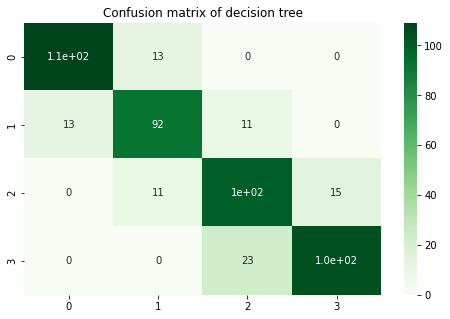

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(con_dt, annot=True,cmap="Greens")
plt.title("Confusion matrix of decision tree")
plt.show()

**4. Random Forest Classifier**

In [ ]:


rf = RandomForestClassifier( n_estimators = 500)
#fitting the model
rf.fit(x_train,y_train)
#predicting the model
y_pred_rf=rf.predict(x_test)

#evaluation metrics
#The accuarcy score of training set
train_rf=round(rf.score(x_train,y_train),3)
print("the training score of decision treee classifier is : ", round(rf.score(x_train,y_train),3))
#test accuracy
acc_rf=accuracy_score(y_test,y_pred_rf)
print("Test Accuracy of Random Forest classifier is: ", round(acc_rf,4)*100,"%")
#confusion matrix
con_rf=confusion_matrix(y_test,y_pred_rf)
print("\n Confusion matrix of Random forest classifier is : \n",con_rf)
#classification report
print("\nThe classification report of Random Forest classifier is:")
print(classification_report(y_test, y_pred_rf))

the training score of decision treee classifier is :  1.0
Test Accuracy of Random Forest classifier is:  89.02 %

 Confusion matrix of Random forest classifier is : 
 [[117   5   0   0]
 [ 12  96   8   0]
 [  0  12 110   4]
 [  0   0  13 115]]

The classification report of Random Forest classifier is:
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93       122
         1.0       0.85      0.83      0.84       116
         2.0       0.84      0.87      0.86       126
         3.0       0.97      0.90      0.93       128

    accuracy                           0.89       492
   macro avg       0.89      0.89      0.89       492
weighted avg       0.89      0.89      0.89       492



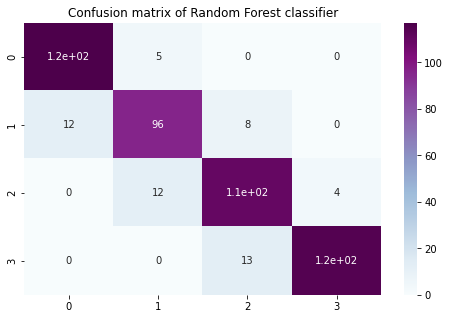

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(con_rf, annot=True,cmap="BuPu")
plt.title("Confusion matrix of Random Forest classifier")
plt.show()

**5. Naive Bayes**

In [ ]:

nb = GaussianNB()
#fitting
nb.fit(x_train, y_train)
#predicting
y_pred_nb = nb.predict(x_test)

#The accuarcy score of training set
train_nb=round(nb.score(x_train,y_train),3)
print("the training score of Naive Bayes classifier is : ", round(nb.score(x_train,y_train),2)*100,"%")
from sklearn.metrics import accuracy_score
#test accuracy
acc_nb=accuracy_score(y_test, y_pred_nb)
print("The test accuracy of Naive bayes is : ", round(acc_nb*100,2),"%")
from sklearn.metrics import confusion_matrix
print("The confusion matrix of Naive Bayes is :\n", confusion_matrix(y_test, y_pred_nb))
#classification report
print("\nThe classification report of Naive Bayes classifier is:")
print(classification_report(y_test, y_pred_nb))

the training score of Naive Bayes classifier is :  81.0 %
The test accuracy of Naive bayes is :  81.71 %
The confusion matrix of Naive Bayes is :
 [[112  10   0   0]
 [  7  91  18   0]
 [  0  21  94  11]
 [  0   0  23 105]]

The classification report of Naive Bayes classifier is:
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93       122
         1.0       0.75      0.78      0.76       116
         2.0       0.70      0.75      0.72       126
         3.0       0.91      0.82      0.86       128

    accuracy                           0.82       492
   macro avg       0.82      0.82      0.82       492
weighted avg       0.82      0.82      0.82       492



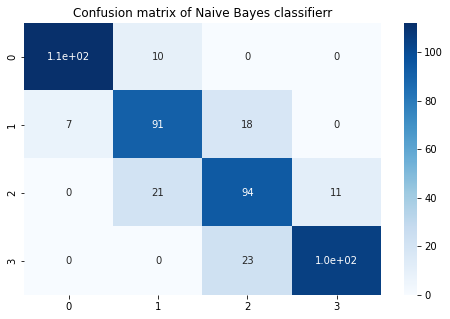

In [ ]:
con_nb=confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8,5))
sns.heatmap(con_nb, annot=True,cmap="Blues")
plt.title("Confusion matrix of Naive Bayes classifierr")
plt.show()

 **6.Support Vector Machine**

In [ ]:

svc=SVC(kernel="rbf")
#fitting
svc.fit(x_train,y_train)
#predicting
y_pred_svm=svc.predict(x_test)

#training score
train_svm=round(svc.score(x_train,y_train),3)
print("Training score of SVM is : ", round(svc.score(x_train,y_train),3))
#accuracy score
from sklearn.metrics import accuracy_score
acc_svm=accuracy_score(y_test,y_pred_svm)
print("The test accuracyscore of SVM is :, ", round(acc_svm,3)*100,"%")
#confusion matrix
print("The confusion matrix of SVM is :\n", confusion_matrix(y_test, y_pred_svm))
#classification report
print("\nThe classification report of SVM is:")
print(classification_report(y_test, y_pred_svm))

Training score of SVM is :  0.989
The test accuracyscore of SVM is :,  86.8 %
The confusion matrix of SVM is :
 [[113   9   0   0]
 [ 10  95  11   0]
 [  0  13 107   6]
 [  0   0  16 112]]

The classification report of SVM is:
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92       122
         1.0       0.81      0.82      0.82       116
         2.0       0.80      0.85      0.82       126
         3.0       0.95      0.88      0.91       128

    accuracy                           0.87       492
   macro avg       0.87      0.87      0.87       492
weighted avg       0.87      0.87      0.87       492



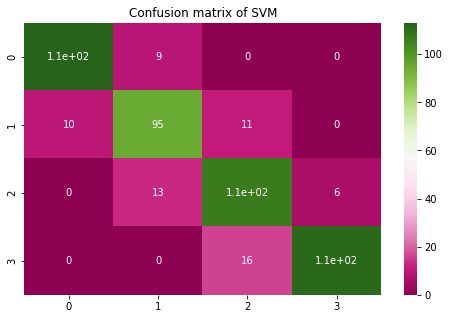

In [ ]:
con_svm=confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8,5))
sns.heatmap(con_svm, annot=True,cmap="PiYG")
plt.title("Confusion matrix of SVM")
plt.show()

**7. XG Booster**

In [ ]:
xgb = XGBClassifier(random_state = 0, learning_rate = 0.1)

xgb.fit(x_train, y_train)

y_pred_xgb = xgb.predict(x_test)

#training score
train_xgb=round(xgb.score(x_train,y_train),3)
print("Training score of xgb classifier is : ", round(xgb.score(x_train,y_train),3))
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy score of extreme gradient boosting is", round(acc_xgb*100,2),"%")
#confusion matrix
print("\n\nThe confusion matrix of extreme gradient boosting is :\n", confusion_matrix(y_test, y_pred_xgb))
#classification report
print("\nThe classification report of extreme gradient boosting is:")
print(classification_report(y_test, y_pred_xgb))

Training score of xgb classifier is :  0.991
Accuracy score of extreme gradient boosting is 89.63 %


The confusion matrix of extreme gradient boosting is :
 [[114   8   0   0]
 [  7 102   7   0]
 [  0  10 109   7]
 [  0   0  12 116]]

The classification report of extreme gradient boosting is:
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94       122
         1.0       0.85      0.88      0.86       116
         2.0       0.85      0.87      0.86       126
         3.0       0.94      0.91      0.92       128

    accuracy                           0.90       492
   macro avg       0.90      0.90      0.90       492
weighted avg       0.90      0.90      0.90       492



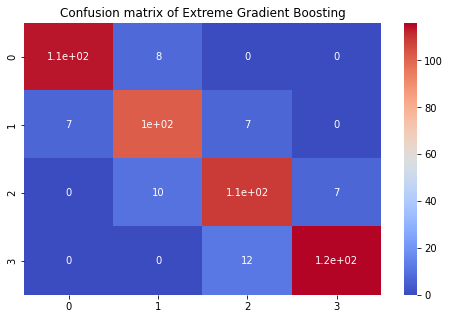

In [ ]:
con_xgb=confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8,5))
sns.heatmap(con_xgb, annot=True,cmap="coolwarm")
plt.title("Confusion matrix of Extreme Gradient Boosting")
plt.show()

**6. Cat Boost**

In [ ]:
pip install catboost

     |████████████████████████████████| 76.1 MB 1.3 MB/s 


In [ ]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier()

cat.fit(x_train, y_train, plot=True, early_stopping_rounds=30, verbose=100)

y_pred_cat=cat.predict(x_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.080714
0:	learn: 1.2775752	total: 61.3ms	remaining: 1m 1s
100:	learn: 0.1940775	total: 697ms	remaining: 6.2s
200:	learn: 0.1064568	total: 1.69s	remaining: 6.7s
300:	learn: 0.0718045	total: 2.31s	remaining: 5.36s
400:	learn: 0.0530860	total: 2.89s	remaining: 4.32s
500:	learn: 0.0403977	total: 3.52s	remaining: 3.5s
600:	learn: 0.0324959	total: 4.3s	remaining: 2.86s
700:	learn: 0.0267168	total: 4.89s	remaining: 2.09s
800:	learn: 0.0226407	total: 5.55s	remaining: 1.38s
900:	learn: 0.0194575	total: 6.19s	remaining: 681ms
999:	learn: 0.0168681	total: 7.28s	remaining: 0us


In [ ]:
y_pred_cat=cat.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,precision_score,recall_score,classification_report


#training score
train_cat=round(cat.score(x_train,y_train),3)
print("Training score of catboost classifier is : ", round(cat.score(x_train,y_train),3))
acc_cat=accuracy_score(y_test,y_pred_cat)
print("Test Accuracy of Cat Boost is : ",round(acc_cat,3)*100,"%" )

con_cat=confusion_matrix(y_test,y_pred_cat)
print("\n The confusion matrix of Cat Boost is \n\n",con_cat)

#classification report
print("\nThe classification report of category booster is:")
print(classification_report(y_test, y_pred_cat))

Training score of catboost classifier is :  1.0
Test Accuracy of Cat Boost is :  94.1 %

 The confusion matrix of Cat Boost is 

 [[119   3   0   0]
 [  5 108   3   0]
 [  0   8 116   2]
 [  0   0   8 120]]

The classification report of category booster is:
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       122
         1.0       0.91      0.93      0.92       116
         2.0       0.91      0.92      0.92       126
         3.0       0.98      0.94      0.96       128

    accuracy                           0.94       492
   macro avg       0.94      0.94      0.94       492
weighted avg       0.94      0.94      0.94       492



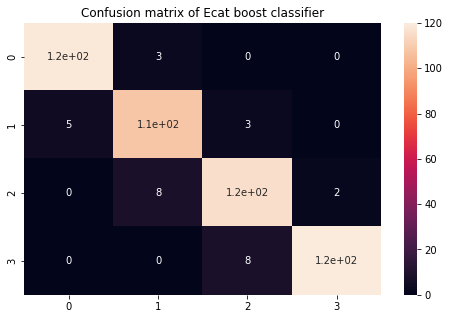

In [ ]:
con_cat=confusion_matrix(y_test, y_pred_cat)
plt.figure(figsize=(8,5))
sns.heatmap(con_cat, annot=True)
plt.title("Confusion matrix of Ecat boost classifier")
plt.show()

In [ ]:
Results = pd.DataFrame(columns = ['Model', 'Training Score',"Accuracy Score"])
Results = Results.append({'Model' : 'Random Forest', 'Training Score': train_rf,"Accuracy Score":round(acc_rf,2)}, ignore_index = True)
Results = Results.append({'Model' : 'Logistic Regression', 'Training Score': train_lr,"Accuracy Score":round(acc_lr,2)}, ignore_index = True)
Results = Results.append({'Model' : 'KNN', 'Training Score': train_knn,"Accuracy Score":round(acc_knn,2)}, ignore_index = True)
Results = Results.append({'Model' : 'Decision Treet', 'Training Score': train_dt,"Accuracy Score":round(acc_dt,2)}, ignore_index = True)
Results = Results.append({'Model' : 'XGBoost', 'Training Score': train_xgb,"Accuracy Score":round(acc_xgb,2)}, ignore_index = True)
Results = Results.append({'Model' : 'CatBoost', 'Training Score': train_cat,"Accuracy Score":round(acc_cat,2)}, ignore_index = True)
Results = Results.append({'Model' : 'Naive Bayes', 'Training Score': train_nb,"Accuracy Score":round(acc_nb,2)}, ignore_index = True)
Results = Results.append({'Model' : 'SVM', 'Training Score': train_svm,"Accuracy Score":round(acc_svm,2)}, ignore_index = True)

Results.sort_values("Accuracy Score",ascending=False)
Results.reset_index(drop=True, inplace=True)

In [ ]:
print("The table that contains the training score and accuracy(test) score for different models")
Results.sort_values("Accuracy Score",ascending=False)

The table that contains the training score and accuracy(test) score for different models


Model  Training Score  Accuracy Score
1  Logistic Regression           0.980            0.95
5             CatBoost           1.000            0.94
4              XGBoost           0.991            0.90
0        Random Forest           1.000            0.89
7                  SVM           0.989            0.87
3       Decision Treet           1.000            0.83
6          Naive Bayes           0.811            0.82
2                  KNN           0.670            0.58

The above table gives the accuracy score and training score for various classification models

**Logistic regression have the highest accuracy score.**

**Hyper parameter Tuning**

Now we are trying to improve the accuracy of catbooster classifier, extreme gradient boosting classifier and Support vector machine using hyper parameter tuning. We are going to change the hyperparameters of these three models using GridSearchCV method.

1. Hyper Parameter Tuning **Random Forest Classifier**

In [ ]:
from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier(random_state=0)
param_grid = { 
    'n_estimators': [10,100, 200, 500,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,10,20],
    'criterion' :['gini', 'entropy'],
    'min_samples_split':[2,4,6,8]
}

CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rf.fit(x_train, y_train)

print(CV_rf.best_params_)

{'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto', 'min_samples_split': 6, 'n_estimators': 200}


In [ ]:
rf_1=RandomForestClassifier(random_state=0,  min_samples_split= 6, max_features='auto', n_estimators=200 , max_depth=20, criterion='entropy')
rf_1.fit(x_train, y_train)
y_pred=rf_1.predict(x_test)
acc_rf_new= round(accuracy_score(y_test,y_pred),2)
print("Accuracy for Random Forest on CV data: ",acc_rf_new)

Accuracy for Random Forest on CV data:  0.89


In [ ]:
print('Improvement of {:0.2f}% in accuracy after performing hyper parameter tuning. '.format( 100 * (acc_rf_new - acc_rf) / acc_rf))

Improvement of -0.03% in accuracy after performing hyper parameter tuning. 


2. **Hyper parameter tuning forxg booster**

In [ ]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
xgb = XGBClassifier()
CV_xgb = GridSearchCV(estimator=xgb, param_grid=params, cv= 5)
CV_xgb.fit(x_train, y_train)

print(CV_xgb.best_params_)



{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.6}


In [ ]:
xgb_1=XGBClassifier(random_state = 0, learning_rate = 0.1, max_depth=5,gamma=0.5,subsample=1.0,colsample_bytree=1.0,min_child_weight=1)
xgb_1.fit(x_train,y_train)
y_pred_x=xgb_1.predict(x_test)
acc_xgb_new=round(accuracy_score(y_test,y_pred_x),3)
print("Accuracy for xb boost on CV data: ",accuracy_score(y_test,y_pred_x))

Accuracy for xb boost on CV data:  0.8983739837398373


In [ ]:
print('Improvement of {:0.2f}% in accuracy after performing hyper parameter tuning. '.format( 100 * (acc_xgb_new - acc_xgb) / acc_xgb))

Improvement of 0.19% in accuracy after performing hyper parameter tuning. 


** 3. Hyper parameter tuning for SVM**

In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

grid.fit(x_train, y_train)

# print best parameter after tuning
print("\n\nThe Best parameters are: \n")
print(grid.best_params_)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.253 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.254 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.258 total time=   0.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.258 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.258 total time=   0.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.253 total time=   0.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.254 total time=   0.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.258 total time=   0.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.258 total time=   0.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.258 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.372 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [ ]:
svc=SVC(kernel="rbf",C= 1000, gamma= 0.0001)
svc.fit(x_train,y_train)
y_pred_svm_new=svc.predict(x_test)

#accuracy score

acc_svm_new=accuracy_score(y_test,y_pred_svm_new)
print("The test accuracy score of SVM after grid search cv is :, ", round(acc_svm_new,3))

The test accuracy score of SVM after grid search cv is :,  0.943


In [ ]:
print('Improvement of {:0.2f}% in accuracy after performing hyper parameter tuning. '.format( 100 * (acc_svm_new - acc_svm) / acc_svm))

Improvement of 8.67% in accuracy after performing hyper parameter tuning. 


4.** Hyper parameter tuning for CAT Booster**

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score
clf = CatBoostClassifier()
params = {'iterations': [100.200,500,1000],
          'depth': [4, 5, 6.8,10],
          'loss_function': ["MultiClass","MultiClassOneVsAll"],
          'leaf_estimation_iterations': [5,10,15],
          'logging_level':['Silent'],
          'random_seed': [0]
         }
scorer = make_scorer(accuracy_score)
clf_grid = GridSearchCV(estimator=clf, param_grid=params, scoring=scorer, cv=5)

In [ ]:
clf_grid.fit(x_train, y_train)
best_param = clf_grid.best_params_
print("The best parameter for cat boost is : ")
print(best_param)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/catboost/core.py", line 4770, in fit
    silent, early_stopping_rounds, save_snapshot, snapshot_file, snapshot_interval, init_model, callbacks, log_cout, log_cerr)
  File "/usr/local/lib/python3.7/dist-packages/catboost/core.py", line 2081, in _fit
    callbacks=callb

The best parameter for cat boost is : 
{'depth': 5, 'iterations': 1000, 'leaf_estimation_iterations': 5, 'logging_level': 'Silent', 'loss_function': 'MultiClass', 'random_seed': 0}


In [ ]:
cat_b = CatBoostClassifier(iterations=1000,
                           loss_function='MultiClass',
                           depth=5,
                           leaf_estimation_iterations=5,
                           logging_level='Silent',
                           random_seed=0
                          )


In [ ]:
cat_b.fit(x_train,y_train)
y_pred_cat=cat_b.predict(x_test)
acc_cat_new=accuracy_score(y_test,y_pred_cat)
print("Accuracy for cat boost on CV data: ",accuracy_score(y_test,y_pred_cat))

Accuracy for cat boost on CV data:  0.9410569105691057


In [ ]:
print('Improvement of {:0.2f}% in accuracy after performing hyper parameter tuning. '.format( 100 * (acc_cat_new - acc_cat) / acc_cat))

Improvement of 0.00% in accuracy after performing hyper parameter tuning. 


**5.Hyper parameter tuning for Logistic Regression**

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
grid_search = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.969288 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
lr=LogisticRegression(C= 10, penalty = 'l2', solver = 'newton-cg')

In [ ]:
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
acc_lr_new=accuracy_score(y_test,y_pred_lr)
print("Accuracy for Logistic Regression on CV data: ",accuracy_score(y_test,y_pred_lr))

Accuracy for Logistic Regression on CV data:  0.9512195121951219


In [ ]:
print('Improvement of {:0.2f}% in accuracy after performing hyper parameter tuning. '.format( 100 * (acc_lr_new - acc_lr) / acc_lr))

Improvement of -0.21% in accuracy after performing hyper parameter tuning. 


 **6.Hyper parameter tuning for KNN**

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

n_neighbors = range(1, 22, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cvalidation = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=grid, n_jobs=-1, cv=cvalidation, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.649032 using {'metric': 'manhattan', 'n_neighbors': 21, 'weights': 'distance'}


**Dataframe showing the model name, the accuracy score before and after hyper parameter tuning**

In [ ]:
print("The table showing the accuracy score of various models before and after hyper parameter tuning")
Result_new = pd.DataFrame(columns = ['Model', 'Initial Accuracy Score',"Accuracy Score after hyper parameter tuning"])
Result_new = Result_new.append({'Model' : 'Random Forest', 'Initial Accuracy Score': acc_rf,"Accuracy Score after hyper parameter tuning":acc_rf_new}, ignore_index = True)
Result_new = Result_new.append({'Model' : 'Extreme Gradient Boosting', 'Initial Accuracy Score': acc_xgb,"Accuracy Score after hyper parameter tuning":acc_xgb_new}, ignore_index = True)
Result_new = Result_new.append({'Model' : 'Suport Vector Machine', 'Initial Accuracy Score': acc_svm,"Accuracy Score after hyper parameter tuning":acc_svm_new}, ignore_index = True)
Result_new = Result_new.append({'Model' : 'Category Booster', 'Initial Accuracy Score': acc_cat,"Accuracy Score after hyper parameter tuning":acc_cat_new}, ignore_index = True)
Result_new = Result_new.append({'Model' : 'Logistic Regression', 'Initial Accuracy Score': acc_lr,"Accuracy Score after hyper parameter tuning":acc_lr_new}, ignore_index = True)
Result_new.sort_values("Accuracy Score after hyper parameter tuning",ascending=False).reset_index(drop=True) 

The table showing the accuracy score of various models before and after hyper parameter tuning


Model  Initial Accuracy Score  \
0        Logistic Regression                0.953252   
1      Suport Vector Machine                0.867886   
2           Category Booster                0.941057   
3  Extreme Gradient Boosting                0.896341   
4              Random Forest                0.890244   

   Accuracy Score after hyper parameter tuning  
0                                     0.951220  
1                                     0.943089  
2                                     0.941057  
3                                     0.898000  
4                                     0.890000

In [ ]:
print("Here we can see that Logistic regression, CAt boost classifier and SVM have good accuracy")

Here we can see that Logistic regression, CAt boost classifier and SVM have good accuracy


**Predicting the test data outputs**

**Now we are going to predict the price range for test data CSV using CAT boost classifier algorithm**

In [ ]:
train_data=mobile_data.copy()

In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier()
train_data_x=train_data.iloc[:,0:20]
train_data_y=train_data["price_range"]

cat.fit(train_data_x,train_data_y, plot=True, early_stopping_rounds=30, verbose=100)

y_pred_test=cat.predict(mobile_data_test)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.081907
0:	learn: 1.2710564	total: 10.6ms	remaining: 10.6s
100:	learn: 0.1874269	total: 651ms	remaining: 5.79s
200:	learn: 0.1085488	total: 1.5s	remaining: 5.97s
300:	learn: 0.0769297	total: 2.48s	remaining: 5.76s
400:	learn: 0.0569473	total: 3.11s	remaining: 4.65s
500:	learn: 0.0445125	total: 3.75s	remaining: 3.73s
600:	learn: 0.0354636	total: 4.59s	remaining: 3.05s
700:	learn: 0.0292540	total: 5.37s	remaining: 2.29s
800:	learn: 0.0247129	total: 6.01s	remaining: 1.49s
900:	learn: 0.0212127	total: 7.09s	remaining: 779ms
999:	learn: 0.0184298	total: 8.78s	remaining: 0us


In [ ]:
mobile_data_test["price_range"]=y_pred_test
mobile_data_test.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0           1043     1          1.8         1  14       0           5    0.1   
1            841     1          0.5         1   4       1          61    0.8   
2           1807     1          2.8         0   1       0          27    0.9   
4           1434     0          1.4         0  11       1          49    0.5   
5           1464     1          2.9         1   5       1          50    0.8   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        193        3  ...        226      1412  3476    12     7          2   
1        191        5  ...        746       857  3895     6     0          7   
2        186        3  ...       1270      1366  2396    17    10         10   
4        108        6  ...        749       810  1773    15     8          7   
5        198        8  ...        569       939  3506    10     7          3   

   three_g  touch_screen  wifi  price_range  
0        0             1     0          3.0  
1        1             0     0          3.0  
2        0             1     1          2.0  
4        1             0     1          1.0  
5        1             1     1          3.0  

[5 rows x 21 columns]

Now the price range of test dataset is predicted, now we are going to create a combined dataset.

**Merging  test and train dataframes.** 



In [ ]:
new_mobile_data=pd.concat([train_data,mobile_data_test],axis=0)
new_mobile_data.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
4           1821     1          1.2         0  13       1          44    0.6   
5           1859     0          0.5         1   3       0          22    0.7   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
4        141        2  ...       1208      1212  1411     8     2         15   
5        164        1  ...       1004      1654  1067    17     1         10   

   three_g  touch_screen  wifi  price_range  
0        0             0     1          1.0  
1        1             1     0          2.0  
2        1             1     0          2.0  
4        1             1     0          1.0  
5        1             0     0          1.0  

[5 rows x 21 columns]

In [ ]:
print("The size of test dataframe",mobile_data_test.shape)
print("The size of train dataframe",train_data.shape)
print("The size of new dataframe",new_mobile_data.shape)

The size of test dataframe (978, 21)
The size of train dataframe (1968, 21)
The size of new dataframe (2946, 21)


In [ ]:
new_mobile_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
data=new_mobile_data.copy()

In [ ]:
#data_copy=data.copy()

# **Ranking**

**Ranking of each feature based on the column value and method dense is performed.**

In [ ]:
data=new_mobile_data.rank(ascending=False,axis=0,method="dense")
data.head()
data["price_range"].value_counts()
data=pd.concat([data, new_mobile_data], axis=1)
print(data.shape)
data.head(2)

(2946, 42)


battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0          977.0   2.0          9.0       2.0  16.0     2.0        58.0   
1          825.0   1.0         26.0       1.0  17.0     1.0        12.0   

   m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0    5.0       13.0      7.0  ...         20       756  2549     9     7   
1    4.0       65.0      6.0  ...        905      1988  2631    17     3   

   talk_time  three_g  touch_screen  wifi  price_range  
0         19        0             0     1          1.0  
1          7        1             1     0          2.0  

[2 rows x 42 columns]

In [ ]:
#price range
data_price=data[["price_range","price_range"]]
price_rank=data_price.iloc[:,0:2]
price_rank.columns=["rank on price range","price_range"]
price_rank.drop_duplicates(["price_range"])

rank on price range  price_range
0                  3.0          1.0
1                  2.0          2.0
6                  1.0          3.0
7                  4.0          0.0

**Price rank of 0 has the lowest rank and 3 has the highest rank**

In [ ]:
#battery power
data_battery=data[["battery_power","battery_power"]]
battery_rank=data_battery.iloc[:,0:2]
battery_rank.columns=["rank on battery","battery_power"]
battery_rank.drop_duplicates(["battery_power"]).sort_values(by="rank on battery")

rank on battery  battery_power
84                1.0           1999
1354              2.0           1998
309               3.0           1997
753               4.0           1996
292               5.0           1995
...               ...            ...
540            1266.0            504
24             1267.0            503
1027           1268.0            502
625            1269.0            501
213            1270.0            500

[1270 rows x 2 columns]

In [ ]:
#blue
data_blue=data[["blue","blue"]]
blue_rank=data_blue.iloc[:,0:2]
blue_rank.columns=["rank on bluetooth","bluetooth"]
blue_rank.drop_duplicates(["bluetooth"]).sort_values(by="rank on bluetooth")

rank on bluetooth  bluetooth
1                1.0          1
0                2.0          0

In [ ]:
#clock_speed
data_clock_speed=data[['clock_speed','clock_speed']]

clock_speed_rank=data_clock_speed.iloc[:,0:2]

clock_speed_rank.columns=["rank on clock_speed",'clock_speed']
clock_speed_rank.drop_duplicates(['clock_speed']).sort_values(by="rank on clock_speed")

rank on clock_speed  clock_speed
50                   1.0          3.0
10                   2.0          2.9
12                   3.0          2.8
34                   4.0          2.7
22                   5.0          2.6
78                   6.0          2.5
71                   7.0          2.4
36                   8.0          2.3
0                    9.0          2.2
13                  10.0          2.1
38                  11.0          2.0
53                  12.0          1.9
47                  13.0          1.8
6                   14.0          1.7
26                  15.0          1.6
52                  16.0          1.5
25                  17.0          1.4
35                  18.0          1.3
4                   19.0          1.2
20                  20.0          1.1
15                  21.0          1.0
17                  22.0          0.9
83                  23.0          0.8
105                 24.0          0.7
9                   25.0          0.6
1                   26.0          0.5

In [ ]:
#dual_sim
data_dual_sim=data[['dual_sim','dual_sim']]
dual_sim_rank=data_dual_sim.iloc[:,0:2]
dual_sim_rank.columns=["rank on dual_sim",'dual_sim']
dual_sim_rank.drop_duplicates(['dual_sim']).sort_values(by="rank on dual_sim")

rank on dual_sim  dual_sim
1               1.0         1
0               2.0         0

In [ ]:
#front cam
data_fc=data[['fc','fc']]
fc_rank=data_fc.iloc[:,0:2]
fc_rank.columns=["rank on fc",'fc']
fc_rank.drop_duplicates(['fc']).sort_values(by="rank on fc")

rank on fc  fc
31          1.0  16
39          2.0  15
237         3.0  14
4           4.0  13
20          5.0  12
18          6.0  11
55          7.0  10
49          8.0   9
41          9.0   8
13         10.0   7
37         11.0   6
11         12.0   5
6          13.0   4
5          14.0   3
2          15.0   2
0          16.0   1
1          17.0   0

In [ ]:
#four_g
data_four_g=data[['four_g','four_g']]
four_g_rank=data_four_g.iloc[:,0:2]
four_g_rank.columns=["rank on four_g",'four_g']
four_g_rank.drop_duplicates(['four_g']).sort_values(by="rank on four_g")

rank on four_g  four_g
1             1.0       1
0             2.0       0

In [ ]:
#internal memory
data_int_memory=data[['int_memory','int_memory']]
int_memory_rank=data_int_memory.iloc[:,0:2]
int_memory_rank.columns=["rank on int_memory",'int_memory']
int_memory_rank.drop_duplicates(['int_memory']).sort_values(by="rank on int_memory")

rank on int_memory  int_memory
49                  1.0          64
51                  2.0          63
275                 3.0          62
36                  4.0          61
35                  5.0          60
..                  ...         ...
37                 59.0           6
30                 60.0           5
112                61.0           4
88                 62.0           3
131                63.0           2

[63 rows x 2 columns]

In [ ]:
#mobile depth
data_m_dep=data[['m_dep','m_dep']]
m_dep_rank=data_m_dep.iloc[:,0:2]
m_dep_rank.columns=["rank on m_dep",'m_dep']
m_dep_rank.drop_duplicates(['m_dep']).sort_values(by="rank on m_dep")

rank on m_dep  m_dep
13            1.0    1.0
2             2.0    0.9
6             3.0    0.8
1             4.0    0.7
0             5.0    0.6
11            6.0    0.5
24            7.0    0.4
22            8.0    0.3
30            9.0    0.2
9            10.0    0.1

In [ ]:
#mobile weight
data_mobile_wt=data[['mobile_wt','mobile_wt']]
mobile_wt_rank=data_mobile_wt.iloc[:,0:2]
mobile_wt_rank.columns=["rank on mobile_wt",'mobile_wt']
mobile_wt_rank.drop_duplicates(['mobile_wt']).sort_values(by="rank on mobile_wt")

rank on mobile_wt  mobile_wt
29                 1.0        200
22                 2.0        199
13                 3.0        198
76                 4.0        197
16                 5.0        196
..                 ...        ...
153              117.0         84
93               118.0         83
116              119.0         82
20               120.0         81
69               121.0         80

[121 rows x 2 columns]

In [ ]:
#n cores
data_n_cores=data[['n_cores','n_cores']]
n_cores_rank=data_n_cores.iloc[:,0:2]
n_cores_rank.columns=["rank on n_cores",'n_cores']
n_cores_rank.drop_duplicates(['n_cores']).sort_values(by="rank on n_cores")

rank on n_cores  n_cores
6               1.0        8
8               2.0        7
38              3.0        6
2               4.0        5
7               5.0        4
1               6.0        3
0               7.0        2
5               8.0        1

In [ ]:
#back camera
data_pc=data[['pc','pc']]
pc_rank=data_pc.iloc[:,0:2]
pc_rank.columns=["rank on pc",'pc']
pc_rank.drop_duplicates(['pc']).sort_values(by="rank on pc")

rank on pc  pc
23          1.0  20
26          2.0  19
11          3.0  18
12          4.0  17
15          5.0  16
9           6.0  15
4           7.0  14
24          8.0  13
118         9.0  12
13         10.0  11
6          11.0  10
30         12.0   9
48         13.0   8
5          14.0   7
1          15.0   6
60         16.0   5
16         17.0   4
25         18.0   3
0          19.0   2
10         20.0   1
7          21.0   0

In [ ]:
#pixel height
data_px_height=data[['px_height','px_height']]
px_height_rank=data_px_height.iloc[:,0:2]
px_height_rank.columns=["rank on px_height",'px_height']
px_height_rank.drop_duplicates(['px_height']).sort_values(by="rank on px_height")

rank on px_height  px_height
1771                1.0       1960
988                 2.0       1949
894                 3.0       1920
260                 4.0       1914
940                 5.0       1907
...                 ...        ...
73               1319.0          4
1314             1320.0          3
1536             1321.0          2
801              1322.0          1
1481             1323.0          0

[1323 rows x 2 columns]

In [ ]:
#pixel weight
data_px_width=data[['px_width','px_width']]
px_width_rank=data_px_width.iloc[:,0:2]
px_width_rank.columns=["rank on px_width",'px_width']
px_width_rank.drop_duplicates(['px_width']).sort_values(by="rank on px_width")

rank on px_width  px_width
719                1.0      1998
964                2.0      1997
152                3.0      1996
219                4.0      1995
988                5.0      1994
...                ...       ...
926             1302.0       506
1713            1303.0       503
637             1304.0       502
696             1305.0       501
185             1306.0       500

[1306 rows x 2 columns]

In [ ]:
#ram
data_ram=data[['ram','ram']]
ram_rank=data_ram.iloc[:,0:2]
ram_rank.columns=["rank on ram",'ram']
ram_rank.drop_duplicates(['ram']).sort_values(by="rank on ram")

rank on ram   ram
940           1.0  3998
1816          2.0  3996
69            3.0  3993
799           4.0  3991
1768          5.0  3990
...           ...   ...
1582       2039.0   263
1224       2040.0   262
1230       2041.0   259
467        2042.0   258
1745       2043.0   256

[2043 rows x 2 columns]

In [ ]:
#screen height
data_sc_h=data[['sc_h','sc_h']]
sc_h_rank=data_sc_h.iloc[:,0:2]
sc_h_rank.columns=["rank on sc_h",'sc_h']
sc_h_rank.drop_duplicates(['sc_h']).sort_values(by="rank on sc_h")

rank on sc_h  sc_h
9            1.0    19
12           2.0    18
1            3.0    17
7            4.0    16
42           5.0    15
11           6.0    14
6            7.0    13
29           8.0    12
2            9.0    11
16          10.0    10
0           11.0     9
4           12.0     8
13          13.0     7
37          14.0     6
10          15.0     5

In [ ]:
#screen width
data_sc_w=data[['sc_w','sc_w']]
sc_w_rank=data_sc_w.iloc[:,0:2]
sc_w_rank.columns=["rank on sc_w",'sc_w']
sc_w_rank.drop_duplicates(['sc_w']).sort_values(by="rank on sc_w")

rank on sc_w  sc_w
369           1.0    18
94            2.0    17
165           3.0    16
15            4.0    15
102           5.0    14
18            6.0    13
39            7.0    12
30            8.0    11
9             9.0    10
11           10.0     9
6            11.0     8
0            12.0     7
61           13.0     6
22           14.0     5
35           15.0     4
1            16.0     3
2            17.0     2
5            18.0     1
12           19.0     0

In [ ]:
#talk_time
data_talk_time=data[['talk_time','talk_time']]
talk_time_rank=data_talk_time.iloc[:,0:2]
talk_time_rank.columns=["rank on talk_time",'talk_time']
talk_time_rank.drop_duplicates(['talk_time']).sort_values(by="rank on talk_time")

rank on talk_time  talk_time
8                 1.0         20
0                 2.0         19
6                 3.0         18
56                4.0         17
18                5.0         16
4                 6.0         15
43                7.0         14
11                8.0         13
9                 9.0         12
15               10.0         11
5                11.0         10
2                12.0          9
67               13.0          8
1                14.0          7
31               15.0          6
7                16.0          5
13               17.0          4
14               18.0          3
12               19.0          2

In [ ]:
#three_g
data_three_g=data[['three_g','three_g']]
three_g_rank=data_three_g.iloc[:,0:2]
three_g_rank.columns=["rank on three_g",'three_g']
three_g_rank.drop_duplicates(['three_g']).sort_values(by="rank on three_g")

rank on three_g  three_g
1              1.0        1
0              2.0        0

In [ ]:
#touch_screen
data_touch_screen=data[['touch_screen','touch_screen']]
touch_screen_rank=data_touch_screen.iloc[:,0:2]
touch_screen_rank.columns=["rank on touch_screen",'touch_screen']
touch_screen_rank.drop_duplicates(['touch_screen']).sort_values(by="rank on touch_screen")

rank on touch_screen  touch_screen
1                   1.0             1
0                   2.0             0

In [ ]:
#wifi
data_wifi=data[['wifi','wifi']]
wifi_rank=data_wifi.iloc[:,0:2]
wifi_rank.columns=["rank on wifi",'wifi']
wifi_rank.drop_duplicates(['wifi']).sort_values(by="rank on wifi")

rank on wifi  wifi
0           1.0     1
1           2.0     0

 **Ranking on Row**

In [ ]:
train_data=mobile_data.copy()

In [ ]:
#ranking the entire column of dataset
ranked_mobiledata_row= mobile_data.rank()
ranked_mobiledata_row.head(3)

battery_power    blue  clock_speed  dual_sim     fc  four_g  int_memory  \
0          480.5   498.0       1453.5     483.5  591.5   472.0       177.0   
1          713.5  1482.0        203.5    1467.5  235.0  1456.0      1641.0   
2           91.5  1482.0        203.5    1467.5  807.0  1456.0      1264.0   

    m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram    sc_h  \
0  1177.5     1756.0    359.5  ...       28.5     333.5  1221.5   531.0   
1  1367.5      918.5    600.0  ...     1440.5    1952.0  1270.0  1631.5   
2  1766.5     1054.0   1109.5  ...     1767.0    1593.5  1252.0   775.5   

     sc_w  talk_time  three_g  touch_screen    wifi  price_range  
0  1261.5     1812.0    236.5         490.5  1472.0        743.5  
1   634.5      568.5   1220.5        1474.5   488.0       1235.0  
2   462.5      778.0   1220.5        1474.5   488.0       1235.0  

[3 rows x 21 columns]

It is difficult for us to interpret from this dataframe si we are going to deal with each columns of the dataset.

In [ ]:
#@title
#ranking the entire column of dataset
ranked_mobiledata_column= mobile_data.rank(axis=1)
ranked_mobiledata_column.head(3)

battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0           20.0   3.0         12.0       3.0   8.0     3.0        13.5   
1           19.0   7.0          3.0       7.0   1.5     7.0        16.0   
2           18.0   6.0          2.0       6.0  10.0     6.0        16.0   

   m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0    6.0       18.0     10.5  ...       17.0      19.0  21.0  15.0  13.5   
1    4.0       17.0     11.5  ...       18.0      20.0  21.0  15.0  11.5   
2    3.0       17.0     12.0  ...       19.0      20.0  21.0  15.0  10.0   

   talk_time  three_g  touch_screen  wifi  price_range  
0       16.0      3.0           3.0   8.0          8.0  
1       14.0      7.0           7.0   1.5         10.0  
2       14.0      6.0           6.0   1.0         10.0  

[3 rows x 21 columns]

In [ ]:
#@title
#rank based on price range
mobile_data["price_range_ranking_row"]=mobile_data["price_range"].rank(ascending=False)
mobile_data.sort_values("price_range",ascending=False).head(3)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1999            510     1          2.0         1   5       1          45   
634            1397     0          2.9         1  13       0           9   
612            1836     1          2.1         1   0       1          30   

      m_dep  mobile_wt  n_cores  ...  px_width   ram  sc_h  sc_w  talk_time  \
1999    0.9        168        6  ...       754  3919    19     4          2   
634     0.5         87        6  ...      1991  3137    12     1         11   
612     0.2        184        7  ...      1230  3072     7     3          5   

      three_g  touch_screen  wifi  price_range  price_range_ranking_row  
1999        1             1     1          3.0                    245.0  
634         1             1     1          3.0                    245.0  
612         1             1     0          3.0                    245.0  

[3 rows x 22 columns]

In [ ]:
#@title
type(mobile_data["price_range"])

pandas.core.series.Series

In [ ]:
#@title
#rank based on price range on column value
#rank based on price range
mobile_data["rank_based_on_price"]=mobile_data["price_range"].rank(ascending=False)
mobile_data.sort_values("price_range",ascending=False).head(3)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1999            510     1          2.0         1   5       1          45   
634            1397     0          2.9         1  13       0           9   
612            1836     1          2.1         1   0       1          30   

      m_dep  mobile_wt  n_cores  ...   ram  sc_h  sc_w  talk_time  three_g  \
1999    0.9        168        6  ...  3919    19     4          2        1   
634     0.5         87        6  ...  3137    12     1         11        1   
612     0.2        184        7  ...  3072     7     3          5        1   

      touch_screen  wifi  price_range  price_range_ranking_row  \
1999             1     1          3.0                    245.0   
634              1     1          3.0                    245.0   
612              1     0          3.0                    245.0   

      rank_based_on_price  
1999                245.0  
634                 245.0  
612                 245.0  

[3 rows x 23 columns]

In [ ]:
#@title

mobile_data[["price_range","rank_based_on_price"]].sort_values("price_range",ascending=False).head(3)

price_range  rank_based_on_price
1999          3.0                245.0
634           3.0                245.0
612           3.0                245.0

In [ ]:
#@title
mobile_data[["price_range","rank_based_on_price"]].sort_values("price_range").head(3)

price_range  rank_based_on_price
774           0.0               1720.5
1193          0.0               1720.5
628           0.0               1720.5

**Price range of 3 has the lowest ranking**

---



In [ ]:
#@title
#rank based on battery power
mobile_data["rank_based on_battery"]=mobile_data[["battery_power"]].rank()
mobile_data[["battery_power","rank_based on_battery"]].sort_values("battery_power",ascending=False).head(3)


battery_power  rank_based on_battery
1354           1998                 1968.0
309            1997                 1967.0
1682           1996                 1965.5

In [ ]:
#@title
mobile_data[["battery_power","rank_based on_battery"]].sort_values("battery_power").head(3)

battery_power  rank_based on_battery
625             501                    1.5
1115            501                    1.5
1618            502                    3.5

The battery power 1998 has the highest rank. abd 501 has the lowest.

In [ ]:
#@title
#rank based on blue
mobile_data["rank_by_blue"]=mobile_data[["blue"]].rank()
mobile_data[["blue","rank_by_blue"]].sort_values("blue",ascending=False).head(3)


blue  rank_by_blue
1999     1        1482.0
1582     1        1482.0
1580     1        1482.0

In [ ]:
#@title
mobile_data[["blue","rank_by_blue"]].sort_values("blue").head(3)

blue  rank_by_blue
0        0         498.0
854      0         498.0
1595     0         498.0

bluetooth = yes has the highest rank and no lowest

In [ ]:
#@title
#rank based on clock_speed
mobile_data["rank_by_clock_speed"]=mobile_data[["clock_speed"]].rank()
mobile_data[["clock_speed","rank_by_clock_speed"]].sort_values("clock_speed",ascending=False).head(3)

clock_speed  rank_by_clock_speed
907           3.0               1954.5
383           3.0               1954.5
1538          3.0               1954.5

In [ ]:
#@title
mobile_data[["clock_speed","rank_by_clock_speed"]].sort_values("clock_speed").head(3)

clock_speed  rank_by_clock_speed
1735          0.5                203.5
476           0.5                203.5
473           0.5                203.5

**Clock speed 3 has the highest rank and 0.5 has the lowest**

In [ ]:
#@title
#rank based on dual_sim
mobile_data["rank_by_dualsim"]=mobile_data[["dual_sim"]].rank()
mobile_data[["dual_sim","rank_by_dualsim"]].sort_values("dual_sim",ascending=False).head(3)

dual_sim  rank_by_dualsim
1006         1           1467.5
1140         1           1467.5
1136         1           1467.5

In [ ]:
#@title
mobile_data[["dual_sim","rank_by_dualsim"]].sort_values("dual_sim").head(3)

dual_sim  rank_by_dualsim
0            0            483.5
1100         0            483.5
1099         0            483.5

**Smartphone having dual sim has the highest ranking and which doesnt have one has the lowest**

In [ ]:
#@title
#rank based on fc
mobile_data["rank_by_fc"]=mobile_data[["fc"]].rank()
mobile_data[["fc","rank_by_fc"]].sort_values("fc",ascending=False).head(3)

fc  rank_by_fc
1788  16      1956.5
1640  16      1956.5
1707  16      1956.5

In [ ]:
#@title
mobile_data[["fc","rank_by_fc"]].sort_values("fc").head(3)

fc  rank_by_fc
1005   0       235.0
1161   0       235.0
1166   0       235.0

**Smartphome with front camera pixel of 16 has the highest ranking and 0 has the lowest**

In [ ]:
#@title
#rank based on 4G
mobile_data["rank_by_4G"]=mobile_data[["four_g"]].rank()
mobile_data[["four_g","rank_by_4G"]].sort_values("four_g",ascending=False).head(3)

four_g  rank_by_4G
1999       1      1456.0
875        1      1456.0
847        1      1456.0

In [ ]:
#@title
mobile_data[["four_g","rank_by_4G"]].sort_values("four_g").head(3)

four_g  rank_by_4G
0          0       472.0
1081       0       472.0
1080       0       472.0

**Smartphone having four g facility as the highest ranking and those doesnt have the one has the lowest.**

In [ ]:
#@title
#rank based on internal memory
mobile_data["rank_by_int_mem"]=mobile_data[["int_memory"]].rank()
mobile_data[["int_memory","rank_by_int_mem"]].sort_values("int_memory",ascending=False).head(3)

int_memory  rank_by_int_mem
1441          64           1953.0
144           64           1953.0
1772          64           1953.0

In [ ]:
#@title
mobile_data[["int_memory","rank_by_int_mem"]].sort_values("int_memory").head(3)

int_memory  rank_by_int_mem
1211           2             20.5
1491           2             20.5
826            2             20.5

**Internal memory 64 has the highest rank and 2 has the lowest.**

In [ ]:
#@title
#rank based on m_depth
mobile_data["rank_by_m_dep"]=mobile_data[["m_dep"]].rank()
mobile_data[["m_dep","rank_by_m_dep"]].sort_values("m_dep",ascending=False).head(3)

m_dep  rank_by_m_dep
828    1.0         1916.0
677    1.0         1916.0
543    1.0         1916.0

In [ ]:
#@title
mobile_data[["m_dep","rank_by_m_dep"]].sort_values("m_dep").head(3)

m_dep  rank_by_m_dep
599     0.1          158.5
1584    0.1          158.5
1585    0.1          158.5

**m_depth of 1 has the highest and 0.1 has the lowest rank**

In [ ]:
#@title
#rank based on mobile_weight
mobile_data["rank_by_mobile_wt"]=mobile_data[["mobile_wt"]].rank()
mobile_data[["mobile_wt","rank_by_mobile_wt"]].sort_values("mobile_wt",ascending=False).head(3)

mobile_wt  rank_by_mobile_wt
557        200             1959.0
516        200             1959.0
662        200             1959.0

In [ ]:
#@title
mobile_data[["mobile_wt","rank_by_mobile_wt"]].sort_values("mobile_wt").head(3)

mobile_wt  rank_by_mobile_wt
1431         80               11.0
853          80               11.0
766          80               11.0

**Mobile weight of 200 has the highest rank and 80 has the lowest.**

In [ ]:
#@title
#rank based on no:of cores
mobile_data["rank_by_n_cores"]=mobile_data[["n_cores"]].rank()
mobile_data[["n_cores","rank_by_n_cores"]].sort_values("n_cores",ascending=False).head(3)

n_cores  rank_by_n_cores
1128        8           1842.0
1134        8           1842.0
1110        8           1842.0

In [ ]:
#@title
mobile_data[["n_cores","rank_by_n_cores"]].sort_values("n_cores").head(3)

n_cores  rank_by_n_cores
200        1            120.0
701        1            120.0
702        1            120.0

**Smartphone with 8 cores have the highest ranking and that of single core have the lowest.**

In [ ]:
#@title
#rank based on pc
mobile_data["rank_by_pc"]=mobile_data[["pc"]].rank()
mobile_data[["pc","rank_by_pc"]].sort_values("pc",ascending=False).head(3)

pc  rank_by_pc
1472  20      1918.0
462   20      1918.0
320   20      1918.0

In [ ]:
#@title
mobile_data[["pc","rank_by_pc"]].sort_values("pc").head(3)

pc  rank_by_pc
1167   0        51.0
981    0        51.0
967    0        51.0

**pc value of 20 has the highest ranking and 0 has the lowest**



In [ ]:
#@title
#rank based on pixel_height
mobile_data["rank_by_px_height"]=mobile_data[["px_height"]].rank()
mobile_data[["px_height","rank_by_px_height"]].sort_values("px_height",ascending=False).head(3)

px_height  rank_by_px_height
1771       1960             1968.0
988        1949             1967.0
894        1920             1966.0

In [ ]:
#@title
mobile_data[["px_height","rank_by_px_height"]].sort_values("px_height").head(3)

px_height  rank_by_px_height
1481          0                1.5
1933          0                1.5
801           1                3.0

**pixel height of 0 has the lowest ranking and 1960 has the highest.**

In [ ]:
#@title
#rank based on px_width
mobile_data["rank_by_px_width"]=mobile_data[["px_width"]].rank()
mobile_data[["px_width","rank_by_px_width"]].sort_values("px_width",ascending=False).head(3)

px_width  rank_by_px_width
719      1998            1968.0
964      1997            1967.0
152      1996            1966.0

In [ ]:
#@title
mobile_data[["px_width","rank_by_px_width"]].sort_values("px_width").head(3)

px_width  rank_by_px_width
1144       500               1.5
185        500               1.5
696        501               3.5

**pixel width of 1998 has the highest rankinG and 500 has the lowest.**

In [ ]:
#@title
#rank based on ram
mobile_data["rank_by_ram"]=mobile_data[["ram"]].rank()
mobile_data[["ram","rank_by_ram"]].sort_values("ram",ascending=False).head(3)

ram  rank_by_ram
940   3998       1968.0
1816  3996       1967.0
69    3993       1966.0

In [ ]:
#@title
mobile_data[["ram","rank_by_ram"]].sort_values("ram").head(3)

ram  rank_by_ram
1745  256          1.0
1389  258          2.5
467   258          2.5

**RAM of 3998 has the highest ranking and 256 has the lowest.**

In [ ]:
#@title
#rank based on screen height
mobile_data["rank_by_sc_h"]=mobile_data[["sc_h"]].rank()
mobile_data[["sc_h","rank_by_sc_h"]].sort_values("sc_h",ascending=False).head(3)

sc_h  rank_by_sc_h
1999    19        1907.5
800     19        1907.5
108     19        1907.5

In [ ]:
#@title
mobile_data[["sc_h","rank_by_sc_h"]].sort_values("sc_h").head(3)

sc_h  rank_by_sc_h
1490     5          48.0
512      5          48.0
1939     5          48.0

**screen height of 19 has the highest ranking and 5 has the lowest ranking**

In [ ]:
#@title
#rank based on sc_w
mobile_data["rank_by_sc_w"]=mobile_data[["sc_w"]].rank()
mobile_data[["sc_w","rank_by_sc_w"]].sort_values("sc_w",ascending=False).head(3)

sc_w  rank_by_sc_w
393     18        1964.5
1254    18        1964.5
1060    18        1964.5

In [ ]:
#@title
mobile_data[["sc_w","rank_by_sc_w"]].sort_values("sc_w").head(3)

sc_w  rank_by_sc_w
1577     0          90.5
1076     0          90.5
435      0          90.5

**Screen width of 18 has the highest ranking and 0 has the lowest**

In [ ]:
#@title
#rank based on talk_time
mobile_data["rank_by_talk_time"]=mobile_data[["talk_time"]].rank()
mobile_data[["talk_time","rank_by_talk_time"]].sort_values("talk_time",ascending=False).head(3)

talk_time  rank_by_talk_time
416          20             1918.5
1101         20             1918.5
1508         20             1918.5

In [ ]:
#@title
mobile_data[["talk_time","rank_by_talk_time"]].sort_values("talk_time").head(3)

talk_time  rank_by_talk_time
1999          2               49.0
502           2               49.0
523           2               49.0

**Talk time of 20 has the highest and 2 has the lowest ranking.**

In [ ]:
#@title
#rank based on three g
mobile_data["rank_by_three_g"]=mobile_data[["three_g"]].rank()
mobile_data[["three_g","rank_by_three_g"]].sort_values("three_g",ascending=False).head(3)

three_g  rank_by_three_g
1006        1           1220.5
1267        1           1220.5
1265        1           1220.5

In [ ]:
#@title
mobile_data[["three_g","rank_by_three_g"]].sort_values("three_g").head(3)

three_g  rank_by_three_g
0          0            236.5
887        0            236.5
889        0            236.5

**Devices with three g facility has the highest ranking and those that doesnt have one has the lowest.**

In [ ]:
#@title
#rank based on touch_screen facility
mobile_data["rank_by_touch_screen"]=mobile_data[["touch_screen"]].rank()
mobile_data[["touch_screen","rank_by_touch_screen"]].sort_values("touch_screen",ascending=False).head(3)

touch_screen  rank_by_touch_screen
1999             1                1474.5
715              1                1474.5
701              1                1474.5

In [ ]:
#@title
mobile_data[["touch_screen","rank_by_touch_screen"]].sort_values("touch_screen").head(3)

touch_screen  rank_by_touch_screen
0                0                 490.5
1125             0                 490.5
1124             0                 490.5

**Devices with touchscreen facility has thehighest ranking and those doesnt have one has the lowest.**

In [ ]:
#@title
#rank based on wifi
mobile_data["rank_by_wifi"]=mobile_data[["wifi"]].rank()
mobile_data[["wifi","rank_by_wifi"]].sort_values("wifi",ascending=False).head(3)

wifi  rank_by_wifi
0        1        1472.0
1069     1        1472.0
1106     1        1472.0

In [ ]:
#@title
mobile_data[["wifi","rank_by_wifi"]].sort_values("wifi").head(3)

wifi  rank_by_wifi
663      0         488.0
1644     0         488.0
691      0         488.0

**Devices that have wi fi facility has the highest ranking and those that doesnt have one has the lowest.**

In [ ]:
#@title
mobile_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'price_range_ranking_row',
       'rank_based_on_price', 'rank_based on_battery', 'rank_by_blue',
       'rank_by_clock_speed', 'rank_by_dualsim', 'rank_by_fc', 'rank_by_4G',
       'rank_by_int_mem', 'rank_by_m_dep', 'rank_by_mobile_wt',
       'rank_by_n_cores', 'rank_by_pc', 'rank_by_px_height',
       'rank_by_px_width', 'rank_by_ram', 'rank_by_sc_h', 'rank_by_sc_w',
       'rank_by_talk_time', 'rank_by_three_g', 'rank_by_touch_screen',
       'rank_by_wifi'],
      dtype='object')

In [ ]:
#@title
# ranking based on each column data
mobile_data_1=mobile_data.iloc[:,0:21]

rank_data_column=mobile_data_1.rank(axis=1,ascending=False,method='max')

rank_data_column.sort_values(ascending=False,by="price_range").head()

battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
1006            2.0  21.0         15.0      14.0   9.0    21.0         8.0   
1436            4.0  16.0         12.0      16.0  11.0    21.0         6.0   
1392            1.0  14.0         16.0      14.0  12.0    21.0         6.0   
536             4.0  21.0         13.0      21.0  10.0    17.0         6.0   
1389            1.0  21.0         16.0      14.0  12.0    21.0         6.0   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width  ram  sc_h  sc_w  \
1006   16.0        5.0     14.0  ...        4.0       3.0  1.0  10.0  11.0   
1436   17.0        5.0     13.0  ...        2.0       1.0  3.0   8.0  10.0   
1392   15.0        5.0     11.0  ...        4.0       2.0  3.0   7.0   8.0   
536    18.0        5.0     12.0  ...        2.0       1.0  3.0   9.0  11.0   
1389   15.0        4.0     12.0  ...        5.0       2.0  3.0   7.0  10.0   

      talk_time  three_g  touch_screen  wifi  price_range  
1006        6.0     14.0          21.0  21.0         21.0  
1436        7.0     21.0          21.0  16.0         21.0  
1392       11.0     21.0          21.0  21.0         21.0  
536         8.0     17.0          17.0  17.0         21.0  
1389        9.0     14.0          21.0  21.0         21.0  

[5 rows x 21 columns]

In [ ]:
#@title
rank_data_column["price_range"].value_counts()

21.0    496
13.0    346
12.0    342
11.0    160
14.0    122
17.0    121
16.0    118
18.0     90
15.0     60
10.0     51
19.0     40
20.0     15
9.0       7
Name: price_range, dtype: int64

**Finding feature importance**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data=pd.read_csv("/content/MobileTrain.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]  
y_new=y = data.iloc[:,-1]   #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features


            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


In [ ]:
new_x=data[["ram","px_height","battery_power","px_width","mobile_wt","int_memory","sc_w","talk_time","fc","sc_h"]]

In [ ]:
new_x.head(2)

ram  px_height  battery_power  px_width  mobile_wt  int_memory  sc_w  \
0  2549         20            842       756        188           7     7   
1  2631        905           1021      1988        136          53     3   

   talk_time  fc  sc_h  
0         19   1     9  
1          7   0    17

In [ ]:
new_x_1=new_x.copy()
#standard scaling
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
new_x=scalar.fit_transform(new_x)
new_x=pd.DataFrame(new_x,columns=new_x_1.columns)
new_x.head(3)

ram  px_height  battery_power  px_width  mobile_wt  int_memory  \
0  0.391703  -1.408949      -0.902597 -1.146784   1.349249   -1.380644   
1  0.467317   0.585778      -0.495139  1.704465  -0.120059    1.155024   
2  0.441498   1.392684      -1.537686  1.074968   0.134244    0.493546   

       sc_w  talk_time        fc      sc_h  
0  0.283103   1.462493 -0.762495 -0.784983  
1 -0.635317  -0.734267 -0.992890  1.114266  
2 -0.864922  -0.368140 -0.532099 -0.310171

In [ ]:

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(new_x,y_new,random_state=0,test_size=0.25)

In [ ]:
pip install CatBoost

In [ ]:
from catboost import CatBoostClassifier
cat=CatBoostClassifier()
cat.fit(X_train,Y_train)
Y_p_cat=cat.predict(X_test)

Learning rate set to 0.08078
0:	learn: 1.2893693	total: 5.7ms	remaining: 5.69s
1:	learn: 1.1830718	total: 11.6ms	remaining: 5.8s
2:	learn: 1.0902775	total: 25.6ms	remaining: 8.52s
3:	learn: 1.0235904	total: 36.1ms	remaining: 8.99s
4:	learn: 0.9673305	total: 46.2ms	remaining: 9.19s
5:	learn: 0.9122845	total: 53.4ms	remaining: 8.85s
6:	learn: 0.8644461	total: 58.8ms	remaining: 8.34s
7:	learn: 0.8217346	total: 63.6ms	remaining: 7.88s
8:	learn: 0.7840870	total: 69.8ms	remaining: 7.68s
9:	learn: 0.7472966	total: 74.7ms	remaining: 7.39s
10:	learn: 0.7112831	total: 79.6ms	remaining: 7.16s
11:	learn: 0.6873601	total: 84.3ms	remaining: 6.94s
12:	learn: 0.6568592	total: 89.2ms	remaining: 6.77s
13:	learn: 0.6376672	total: 93.8ms	remaining: 6.6s
14:	learn: 0.6098431	total: 98.6ms	remaining: 6.47s
15:	learn: 0.5894558	total: 103ms	remaining: 6.35s
16:	learn: 0.5675935	total: 108ms	remaining: 6.24s
17:	learn: 0.5478133	total: 113ms	remaining: 6.14s
18:	learn: 0.5292663	total: 117ms	remaining: 6.05s


In [ ]:

#testing score
acc_cat_new_1=accuracy_score(Y_test,Y_p_cat)
print("Test Accuracy of Catboost classifier after feature reduction is : ",acc_cat_new_1 )
#confusion matrix
con_cat_new=confusion_matrix(Y_test,Y_p_cat)
print("\n The confusion matrix of Catboost classifier after feature reduction is \n\n",con_cat_new)
#classification report
print("\n The classification report of Catboost classifier after feature reduction is : \n")
print(classification_report(Y_test, Y_p_cat))

Test Accuracy of Catboost classifier after feature reduction is :  0.952

 The confusion matrix of Catboost classifier after feature reduction is 

 [[122   2   0   0]
 [  3 104   3   0]
 [  0   7 113   5]
 [  0   0   4 137]]

 The classification report of Catboost classifier after feature reduction is : 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       124
           1       0.92      0.95      0.93       110
           2       0.94      0.90      0.92       125
           3       0.96      0.97      0.97       141

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500



In [ ]:
acc_cat

0.9410569105691057

In [ ]:
acc_cat_new_1

0.952

In [ ]:
increased_acc=round(((acc_cat_new-acc_cat)/acc_cat_new)*100,2)
print("After doing feature reduction the accuracy of the cat boost is increased by {} %".format(increased_acc))

After doing feature reduction the accuracy of the cat boost is increased by 0.0 %


So we can reduced the fetures number to get improved accuracy.